# 분류

## 데이터 불러오기

In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

data=pd.read_csv('D:\Machine Learning\ADP-master\data/bikeshare.csv')

# type별로 컬럼 분류
col_id = []
col_dt = ['datetime']
col_cat = ['season']
col_int = ['weather', 'humidity','casual','registered','count']
col_float = ['temp','atemp','windspeed']
col_bool = ['holiday','workingday']

col_num = col_int + col_float
data['datetime'] = pd.to_datetime(data['datetime'])
data[col_cat]= data[col_cat].astype('str')
data[col_int] = data[col_int].astype('int', errors='ignore')
data[col_float] = data[col_float].astype('float')

data.loc[data['count'] <= 150, 'y1'] = 0
data.loc[(data['count']>150)&(data['count'] <= 300), 'y1'] = 1
data.loc[(data['count']>300)&(data['count'] <= 450), 'y1'] = 2
data.loc[data['count'] > 450, 'y1'] = 3

data.head()
X_data=data[['holiday', 'workingday', 'weather', 'temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered']]
Y_data=data[['y1']]

In [2]:
X_data.head()

,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered
0,0,0,1,9.84,14.395,81,0.0,3,13
1,0,0,1,9.02,13.635,80,0.0,8,32
2,0,0,1,9.02,13.635,80,0.0,5,27
3,0,0,1,9.84,14.395,75,0.0,3,10
4,0,0,1,9.84,14.395,75,0.0,0,1


In [3]:
Y_data.head()

,y1
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0


## 분류모델 성능 평가

In [4]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score, roc_curve, auc, classification_report

In [ ]:
confusion = confusion_matrix( y_test, pred)
accuracy_score(y_test, pred) # 정확도 
precision_score(y_test, pred) # 정밀도 : TP/ (FP+TP) 
recall_score(y_test , pred) # 재현율 : TP/(FN+TP) 
f1_score(y_test,pred) # F1
roc_auc_score(y_test, pred) # AUC 
tn, fp, fn, tp = confusion_matrix(y_test, pred).ravel()
specificity = tn / (tn+fp) #특이도 : TN/(TN+FP)
classification_report(y_test, pred)

def roc_curve_plot(y_test , pred_proba_c1):
    fprs , tprs , thresholds = roc_curve(y_test ,pred_proba_c1)   # auc(fpr, tpr) : auc값 출력
    plt.plot(fprs , tprs, label='ROC')
    plt.plot([0, 1], [0, 1], 'k--', label='Random')
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    plt.xlim(0,1); plt.ylim(0,1)
    plt.xlabel('FPR( 1 - Sensitivity )'); plt.ylabel('TPR( Recall )')
    plt.legend()
    plt.show()
    
roc_curve_plot(y_test, lr_clf.predict_proba(X_test)[:, 1] )

## 모델링

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X_data, Y_data, test_size=0.3, random_state=0)

In [6]:
from sklearn.linear_model import LogisticRegression #로지스틱회귀
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.tree import DecisionTreeClassifier #의사결정트리
from sklearn.ensemble import VotingClassifier, RandomForestClassifier, GradientBoostingClassifier #보팅, 랜덤포레스트, GBM
from xgboost import XGBClassifier #XGB
from lightgbm import LGBMClassifier #LGB (지원X)

In [7]:
lr_clf=LogisticRegression()
knn_clf=KNeighborsClassifier(n_neighbors=8)
dt_clf=DecisionTreeClassifier(random_state=156)
vo_clf=VotingClassifier(estimators=[('LR', lr_clf), ('KNN', knn_clf)], voting='soft')
rf_clf=RandomForestClassifier(random_state=0, n_jobs=-1)
gb_clf=GradientBoostingClassifier(random_state=0)
xgb_clf=XGBClassifier(n_estimators=400, learning_rate=0.1, max_depth=3)
lgbm_clf=LGBMClassifier(n_estimators=1000, num_leaves=63, n_jobs=-1, boost_from_average=False)

In [8]:
lr_clf.fit(X_train, y_train)
knn_clf.fit(X_train, y_train)
dt_clf.fit(X_train, y_train)
vo_clf.fit(X_train, y_train)
rf_clf.fit(X_train, y_train)
gb_clf.fit(X_train, y_train)
xgb_clf.fit(X_train, y_train, early_stopping_rounds=100, eval_metric='auc', eval_set=[(X_test, y_test)], verbose=True)
lgbm_clf.fit(X_train, y_train,early_stopping_rounds=100, eval_metric='logloss', eval_set=[(X_test, y_test)], verbose=True)

lr_pred=lr_clf.predict(X_test)
knn_pred=knn_clf.predict(X_test)
dt_pred=dt_clf.predict(X_test)
vo_pred=vo_clf.predict(X_test)
rf_pred=rf_clf.predict(X_test)
gb_pred=gb_clf.predict(X_test)
xgb_pred=xgb_clf.predict(X_test)
lgbm_pred=lgbm_clf.predict(X_test)

[0]	validation_0-auc:0.99266
[1]	validation_0-auc:0.99313
[2]	validation_0-auc:0.99383
[3]	validation_0-auc:0.99410
[4]	validation_0-auc:0.99466
[5]	validation_0-auc:0.99508
[6]	validation_0-auc:0.99522
[7]	validation_0-auc:0.99557
[8]	validation_0-auc:0.99569
[9]	validation_0-auc:0.99572
[10]	validation_0-auc:0.99587
[11]	validation_0-auc:0.99601
[12]	validation_0-auc:0.99616
[13]	validation_0-auc:0.99636
[14]	validation_0-auc:0.99649
[15]	validation_0-auc:0.99655
[16]	validation_0-auc:0.99669
[17]	validation_0-auc:0.99686
[18]	validation_0-auc:0.99717
[19]	validation_0-auc:0.99736
[20]	validation_0-auc:0.99750
[21]	validation_0-auc:0.99765
[22]	validation_0-auc:0.99783
[23]	validation_0-auc:0.99809
[24]	validation_0-auc:0.99821
[25]	validation_0-auc:0.99838
[26]	validation_0-auc:0.99850
[27]	validation_0-auc:0.99858
[28]	validation_0-auc:0.99863
[29]	validation_0-auc:0.99865
[30]	validation_0-auc:0.99867
[31]	validation_0-auc:0.99874
[32]	validation_0-auc:0.99877
[33]	validation_0-au

[267]	validation_0-auc:0.99979
[268]	validation_0-auc:0.99979
[269]	validation_0-auc:0.99979
[270]	validation_0-auc:0.99979
[271]	validation_0-auc:0.99979
[272]	validation_0-auc:0.99978
[273]	validation_0-auc:0.99978
[274]	validation_0-auc:0.99978
[275]	validation_0-auc:0.99978
[276]	validation_0-auc:0.99978
[277]	validation_0-auc:0.99978
[278]	validation_0-auc:0.99978
[279]	validation_0-auc:0.99978
[280]	validation_0-auc:0.99978
[281]	validation_0-auc:0.99978
[282]	validation_0-auc:0.99978
[283]	validation_0-auc:0.99978
[284]	validation_0-auc:0.99978
[285]	validation_0-auc:0.99978
[286]	validation_0-auc:0.99978
[287]	validation_0-auc:0.99978
[288]	validation_0-auc:0.99978
[289]	validation_0-auc:0.99979
[290]	validation_0-auc:0.99978
[291]	validation_0-auc:0.99978
[292]	validation_0-auc:0.99978
[293]	validation_0-auc:0.99978
[294]	validation_0-auc:0.99978
[295]	validation_0-auc:0.99978
[296]	validation_0-auc:0.99978
[297]	validation_0-auc:0.99978
[298]	validation_0-auc:0.99979
[299]	va

In [9]:
print('LogisticRegression 분류기 정확도:', accuracy_score(y_test, lr_pred))
print('KNN 분류기 정확도:', accuracy_score(y_test, knn_pred))
print('Decision Tree 분류기 정확도:', accuracy_score(y_test, dt_pred))
print('Voting 분류기 정확도:', accuracy_score(y_test, vo_pred))
print('Random Forest 분류기 정확도:', accuracy_score(y_test, rf_pred))
print('Gradient Boosting 분류기 정확도:', accuracy_score(y_test, gb_pred))
print('XGB 분류기 정확도:', accuracy_score(y_test, xgb_pred))
print('LGB 분류기 정확도:', accuracy_score(y_test, lgbm_pred))

LogisticRegression 분류기 정확도: 0.8591549295774648
KNN 분류기 정확도: 0.9816289038579302
Decision Tree 분류기 정확도: 0.9865278628291488
Voting 분류기 정확도: 0.971830985915493
Random Forest 분류기 정확도: 0.9828536436007348
Gradient Boosting 분류기 정확도: 0.9874464176362523
XGB 분류기 정확도: 0.984996938150643
LGB 분류기 정확도: 0.9883649724433557


## cross_val_score 

In [10]:
from sklearn.model_selection import cross_val_score
import numpy as np

scores_lr=cross_val_score(lr_clf, X_data, Y_data, scoring='accuracy', cv=3)
scores_knn=cross_val_score(knn_clf, X_data, Y_data, scoring='accuracy', cv=3)
scores_dt=cross_val_score(dt_clf, X_data, Y_data, scoring='accuracy', cv=3)
scores_vo=cross_val_score(vo_clf, X_data, Y_data, scoring='accuracy', cv=3)
scores_rf=cross_val_score(rf_clf, X_data, Y_data, scoring='accuracy', cv=3)
scores_gb=cross_val_score(gb_clf, X_data, Y_data, scoring='accuracy', cv=3)
scores_xgb=cross_val_score(xgb_clf, X_data, Y_data, scoring='accuracy', cv=3)

print('cross_LogisticRegression 분류기 정확도:', np.round(np.mean(scores_lr),4))
print('corss_KNN 분류기 정확도:', np.round(np.mean(scores_knn),4))
print('cross_Decision Tree 분류기 정확도:', np.round(np.mean(scores_dt),4))
print('cross_Voting 분류기 정확도:', np.round(np.mean(scores_vo),4))
print('cross_Random Forest 분류기 정확도:', np.round(np.mean(scores_rf),4))
print('cross_Gradient Boosting 분류기 정확도:', np.round(np.mean(scores_gb),4))
print('cross_XGB 분류기 정확도:', np.round(np.mean(scores_xgb),4))

[20:53:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:53:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:53:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
cross_LogisticRegression 분류기 정확도: 0.844
corss_KNN 분류기 정확도: 0.972
cr

## GridSearchCV

- DecisionTreeClassifier : min_sample_split, min_samples_leaf, max_features, max_depth, max_leaf_nodes
- RandomForestClassifier : n_estimators, max_features, max_depth, min_samples_leaf, min_samples_split
- GBM : loss, learning_rate, n_estimators, subsample
- XGB : eta, num_boost_rounds, min_child_weight, gamma, max_depth, sub_sample, colsample_bytree, lambda, alpha, scale_pos_weight
- LGB: num_iterations, learning_rate, max_depth, min_date_in_leaf, num_leaves, boosting, bagging_fraction, feature_fraction, lambda_l2

In [11]:
from sklearn.model_selection import GridSearchCV
lr_params={'penalty': ['l2', 'l1'],'C': [0.01, 0.1, 1, 5, 10]}
dt_params={'max_depth' : [9, 12, 16,20], 'min_samples_split' : [16,24]}
rf_params={'n_estimators':[100], 'max_depth': [6,8,10,12], 'min_samples_leaf':[8,12,18], 'min_samples_split':[8,16,20]}
gb_params={'n_estimators':[100,500], 'learning_rate' : [0.05, 0.1]}
xgb_params={'max_depth': [5,7], 'min_child_weight': [1,3], 'colsample_bytree':[0.5, 0.75]}
lgbm_params={'num_leaves':[32,64], 'max_depth':[128, 160], 'min_child_samples':[60,100], 'subsample':[0.8, 1]}

In [12]:
grid_lr_clf=GridSearchCV(lr_clf, param_grid=lr_params, scoring='accuracy', cv=3)
grid_dt_clf=GridSearchCV(dt_clf, param_grid=dt_params, scoring='accuracy', cv=5, verbose=1)
grid_rf_clf=GridSearchCV(rf_clf, param_grid=rf_params, scoring='accuracy', cv=2, n_jobs=-1)
grid_gb_clf=GridSearchCV(gb_clf, param_grid=gb_params, scoring='accuracy', cv=2, verbose=1)
grid_xgb_clf=GridSearchCV(xgb_clf, param_grid=xgb_params)
grid_lgbm_clf=GridSearchCV(lgbm_clf, param_grid=lgbm_params)

grid_clf.best_score_  : 최적평균 정확도
grid_clf.best_params_  : 최적의 하이퍼파라미터
grid_clf.best_estimator_ : 최적의 모델

In [13]:
grid_lr_clf.fit(X_train, y_train)
print('최적의 하이퍼파라미터',grid_lr_clf.best_params_)
print('최적평균 정확도:', grid_lr_clf.best_score_)

최적의 하이퍼파라미터 {'C': 0.01, 'penalty': 'l2'}
최적평균 정확도: 0.8624671916010498


In [14]:
grid_dt_clf.fit(X_train, y_train)
print('최적의 하이퍼파라미터:', grid_dt_clf.best_params_)
print('최적평균 정확도:', grid_dt_clf.best_score_)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
최적의 하이퍼파라미터: {'max_depth': 12, 'min_samples_split': 16}
최적평균 정확도: 0.9792650918635172


In [15]:
grid_rf_clf.fit(X_train, y_train)
print('최적의 하이퍼파라미터:', grid_rf_clf.best_params_)
print('최적평균 정확도:', grid_rf_clf.best_score_)

최적의 하이퍼파라미터: {'max_depth': 12, 'min_samples_leaf': 8, 'min_samples_split': 20, 'n_estimators': 100}
최적평균 정확도: 0.9713910761154856


In [16]:
grid_gb_clf.fit(X_train, y_train)
print('최적의 하이퍼파라미터:', grid_gb_clf.best_params_)
print('최적평균 정확도:', grid_gb_clf.best_score_)
scores_df=pd.DataFrame(grid_gb_clf.cv_results_)
scores_df[['params', 'mean_test_score', 'rank_test_score', 'split0_test_score', 'split1_test_score']]

Fitting 2 folds for each of 4 candidates, totalling 8 fits
최적의 하이퍼파라미터: {'learning_rate': 0.1, 'n_estimators': 100}
최적평균 정확도: 0.9813648293963255


,params,mean_test_score,rank_test_score,split0_test_score,split1_test_score
0,"{'learning_rate': 0.05, 'n_estimators': 100}",0.981234,2,0.984252,0.978215
1,"{'learning_rate': 0.05, 'n_estimators': 500}",0.980184,3,0.983202,0.977165
2,"{'learning_rate': 0.1, 'n_estimators': 100}",0.981365,1,0.983990,0.978740
3,"{'learning_rate': 0.1, 'n_estimators': 500}",0.978871,4,0.981102,0.976640


In [17]:
grid_xgb_clf.fit(X_train, y_train, early_stopping_rounds=30, eval_metric='auc', eval_set=[(X_train, y_train),(X_test, y_test)])
print('최적의 하이퍼파라미터:', grid_xgb_clf.best_params_)

[0]	validation_0-auc:0.81396	validation_1-auc:0.80282
[1]	validation_0-auc:0.96981	validation_1-auc:0.95916
[2]	validation_0-auc:0.99589	validation_1-auc:0.99205
[3]	validation_0-auc:0.99621	validation_1-auc:0.99306
[4]	validation_0-auc:0.99590	validation_1-auc:0.99229
[5]	validation_0-auc:0.99516	validation_1-auc:0.99110
[6]	validation_0-auc:0.99418	validation_1-auc:0.99002
[7]	validation_0-auc:0.99740	validation_1-auc:0.99509
[8]	validation_0-auc:0.99782	validation_1-auc:0.99604
[9]	validation_0-auc:0.99837	validation_1-auc:0.99695
[10]	validation_0-auc:0.99831	validation_1-auc:0.99686
[11]	validation_0-auc:0.99817	validation_1-auc:0.99660
[12]	validation_0-auc:0.99839	validation_1-auc:0.99690
[13]	validation_0-auc:0.99841	validation_1-auc:0.99690
[14]	validation_0-auc:0.99859	validation_1-auc:0.99714
[15]	validation_0-auc:0.99870	validation_1-auc:0.99726
[16]	validation_0-auc:0.99875	validation_1-auc:0.99729
[17]	validation_0-auc:0.99862	validation_1-auc:0.99711
[18]	validation_0-au

[149]	validation_0-auc:0.99995	validation_1-auc:0.99930
[150]	validation_0-auc:0.99995	validation_1-auc:0.99930
[151]	validation_0-auc:0.99995	validation_1-auc:0.99930
[152]	validation_0-auc:0.99995	validation_1-auc:0.99930
[153]	validation_0-auc:0.99996	validation_1-auc:0.99931
[154]	validation_0-auc:0.99996	validation_1-auc:0.99932
[155]	validation_0-auc:0.99996	validation_1-auc:0.99933
[156]	validation_0-auc:0.99996	validation_1-auc:0.99933
[157]	validation_0-auc:0.99996	validation_1-auc:0.99934
[158]	validation_0-auc:0.99996	validation_1-auc:0.99935
[159]	validation_0-auc:0.99996	validation_1-auc:0.99935
[160]	validation_0-auc:0.99996	validation_1-auc:0.99935
[161]	validation_0-auc:0.99996	validation_1-auc:0.99935
[162]	validation_0-auc:0.99996	validation_1-auc:0.99936
[163]	validation_0-auc:0.99996	validation_1-auc:0.99936
[164]	validation_0-auc:0.99996	validation_1-auc:0.99936
[165]	validation_0-auc:0.99996	validation_1-auc:0.99937
[166]	validation_0-auc:0.99996	validation_1-auc:

[296]	validation_0-auc:0.99997	validation_1-auc:0.99951
[297]	validation_0-auc:0.99997	validation_1-auc:0.99951
[298]	validation_0-auc:0.99997	validation_1-auc:0.99951
[299]	validation_0-auc:0.99997	validation_1-auc:0.99951
[300]	validation_0-auc:0.99997	validation_1-auc:0.99951
[301]	validation_0-auc:0.99997	validation_1-auc:0.99951
[302]	validation_0-auc:0.99997	validation_1-auc:0.99951
[303]	validation_0-auc:0.99997	validation_1-auc:0.99951
[304]	validation_0-auc:0.99997	validation_1-auc:0.99951
[305]	validation_0-auc:0.99997	validation_1-auc:0.99951
[306]	validation_0-auc:0.99997	validation_1-auc:0.99951
[307]	validation_0-auc:0.99997	validation_1-auc:0.99952
[308]	validation_0-auc:0.99997	validation_1-auc:0.99952
[309]	validation_0-auc:0.99997	validation_1-auc:0.99952
[310]	validation_0-auc:0.99997	validation_1-auc:0.99952
[311]	validation_0-auc:0.99997	validation_1-auc:0.99952
[312]	validation_0-auc:0.99997	validation_1-auc:0.99952
[313]	validation_0-auc:0.99997	validation_1-auc:

[44]	validation_0-auc:0.99943	validation_1-auc:0.99807
[45]	validation_0-auc:0.99944	validation_1-auc:0.99810
[46]	validation_0-auc:0.99948	validation_1-auc:0.99814
[47]	validation_0-auc:0.99949	validation_1-auc:0.99813
[48]	validation_0-auc:0.99952	validation_1-auc:0.99821
[49]	validation_0-auc:0.99955	validation_1-auc:0.99827
[50]	validation_0-auc:0.99958	validation_1-auc:0.99833
[51]	validation_0-auc:0.99958	validation_1-auc:0.99836
[52]	validation_0-auc:0.99958	validation_1-auc:0.99836
[53]	validation_0-auc:0.99958	validation_1-auc:0.99836
[54]	validation_0-auc:0.99962	validation_1-auc:0.99843
[55]	validation_0-auc:0.99963	validation_1-auc:0.99843
[56]	validation_0-auc:0.99963	validation_1-auc:0.99842
[57]	validation_0-auc:0.99966	validation_1-auc:0.99850
[58]	validation_0-auc:0.99967	validation_1-auc:0.99850
[59]	validation_0-auc:0.99967	validation_1-auc:0.99852
[60]	validation_0-auc:0.99968	validation_1-auc:0.99858
[61]	validation_0-auc:0.99968	validation_1-auc:0.99859
[62]	valid

[191]	validation_0-auc:0.99996	validation_1-auc:0.99941
[192]	validation_0-auc:0.99996	validation_1-auc:0.99941
[193]	validation_0-auc:0.99996	validation_1-auc:0.99941
[194]	validation_0-auc:0.99996	validation_1-auc:0.99941
[195]	validation_0-auc:0.99996	validation_1-auc:0.99941
[196]	validation_0-auc:0.99996	validation_1-auc:0.99941
[197]	validation_0-auc:0.99996	validation_1-auc:0.99941
[198]	validation_0-auc:0.99996	validation_1-auc:0.99941
[199]	validation_0-auc:0.99996	validation_1-auc:0.99941
[200]	validation_0-auc:0.99996	validation_1-auc:0.99941
[201]	validation_0-auc:0.99996	validation_1-auc:0.99941
[202]	validation_0-auc:0.99996	validation_1-auc:0.99942
[203]	validation_0-auc:0.99996	validation_1-auc:0.99942
[204]	validation_0-auc:0.99996	validation_1-auc:0.99942
[205]	validation_0-auc:0.99996	validation_1-auc:0.99941
[206]	validation_0-auc:0.99996	validation_1-auc:0.99941
[207]	validation_0-auc:0.99996	validation_1-auc:0.99941
[208]	validation_0-auc:0.99996	validation_1-auc:

[338]	validation_0-auc:0.99997	validation_1-auc:0.99951
[339]	validation_0-auc:0.99997	validation_1-auc:0.99951
[340]	validation_0-auc:0.99997	validation_1-auc:0.99951
[341]	validation_0-auc:0.99997	validation_1-auc:0.99951
[342]	validation_0-auc:0.99997	validation_1-auc:0.99951
[343]	validation_0-auc:0.99997	validation_1-auc:0.99951
[344]	validation_0-auc:0.99997	validation_1-auc:0.99951
[345]	validation_0-auc:0.99997	validation_1-auc:0.99951
[346]	validation_0-auc:0.99997	validation_1-auc:0.99952
[347]	validation_0-auc:0.99997	validation_1-auc:0.99952
[348]	validation_0-auc:0.99997	validation_1-auc:0.99952
[349]	validation_0-auc:0.99997	validation_1-auc:0.99952
[350]	validation_0-auc:0.99997	validation_1-auc:0.99952
[351]	validation_0-auc:0.99997	validation_1-auc:0.99952
[352]	validation_0-auc:0.99997	validation_1-auc:0.99952
[353]	validation_0-auc:0.99997	validation_1-auc:0.99952
[354]	validation_0-auc:0.99997	validation_1-auc:0.99952
[355]	validation_0-auc:0.99997	validation_1-auc:

[86]	validation_0-auc:0.99978	validation_1-auc:0.99882
[87]	validation_0-auc:0.99979	validation_1-auc:0.99882
[88]	validation_0-auc:0.99979	validation_1-auc:0.99885
[89]	validation_0-auc:0.99980	validation_1-auc:0.99887
[90]	validation_0-auc:0.99980	validation_1-auc:0.99887
[91]	validation_0-auc:0.99981	validation_1-auc:0.99887
[92]	validation_0-auc:0.99981	validation_1-auc:0.99887
[93]	validation_0-auc:0.99981	validation_1-auc:0.99887
[94]	validation_0-auc:0.99981	validation_1-auc:0.99888
[95]	validation_0-auc:0.99982	validation_1-auc:0.99888
[96]	validation_0-auc:0.99982	validation_1-auc:0.99890
[97]	validation_0-auc:0.99983	validation_1-auc:0.99893
[98]	validation_0-auc:0.99983	validation_1-auc:0.99893
[99]	validation_0-auc:0.99984	validation_1-auc:0.99893
[100]	validation_0-auc:0.99984	validation_1-auc:0.99896
[101]	validation_0-auc:0.99984	validation_1-auc:0.99897
[102]	validation_0-auc:0.99984	validation_1-auc:0.99897
[103]	validation_0-auc:0.99985	validation_1-auc:0.99897
[104]	

[233]	validation_0-auc:0.99995	validation_1-auc:0.99942
[234]	validation_0-auc:0.99995	validation_1-auc:0.99942
[235]	validation_0-auc:0.99995	validation_1-auc:0.99942
[236]	validation_0-auc:0.99995	validation_1-auc:0.99942
[237]	validation_0-auc:0.99995	validation_1-auc:0.99942
[238]	validation_0-auc:0.99995	validation_1-auc:0.99943
[239]	validation_0-auc:0.99995	validation_1-auc:0.99943
[240]	validation_0-auc:0.99995	validation_1-auc:0.99943
[241]	validation_0-auc:0.99995	validation_1-auc:0.99943
[242]	validation_0-auc:0.99995	validation_1-auc:0.99943
[243]	validation_0-auc:0.99995	validation_1-auc:0.99943
[244]	validation_0-auc:0.99996	validation_1-auc:0.99943
[245]	validation_0-auc:0.99996	validation_1-auc:0.99943
[246]	validation_0-auc:0.99996	validation_1-auc:0.99943
[247]	validation_0-auc:0.99996	validation_1-auc:0.99943
[248]	validation_0-auc:0.99996	validation_1-auc:0.99943
[249]	validation_0-auc:0.99996	validation_1-auc:0.99943
[250]	validation_0-auc:0.99996	validation_1-auc:

[90]	validation_0-auc:0.99984	validation_1-auc:0.99888
[91]	validation_0-auc:0.99984	validation_1-auc:0.99887
[92]	validation_0-auc:0.99984	validation_1-auc:0.99888
[93]	validation_0-auc:0.99985	validation_1-auc:0.99888
[94]	validation_0-auc:0.99985	validation_1-auc:0.99890
[95]	validation_0-auc:0.99985	validation_1-auc:0.99890
[96]	validation_0-auc:0.99986	validation_1-auc:0.99894
[97]	validation_0-auc:0.99987	validation_1-auc:0.99897
[98]	validation_0-auc:0.99987	validation_1-auc:0.99899
[99]	validation_0-auc:0.99987	validation_1-auc:0.99899
[100]	validation_0-auc:0.99988	validation_1-auc:0.99902
[101]	validation_0-auc:0.99988	validation_1-auc:0.99903
[102]	validation_0-auc:0.99988	validation_1-auc:0.99903
[103]	validation_0-auc:0.99988	validation_1-auc:0.99905
[104]	validation_0-auc:0.99988	validation_1-auc:0.99905
[105]	validation_0-auc:0.99988	validation_1-auc:0.99905
[106]	validation_0-auc:0.99988	validation_1-auc:0.99905
[107]	validation_0-auc:0.99989	validation_1-auc:0.99908
[1

[237]	validation_0-auc:0.99997	validation_1-auc:0.99949
[238]	validation_0-auc:0.99997	validation_1-auc:0.99949
[239]	validation_0-auc:0.99997	validation_1-auc:0.99949
[240]	validation_0-auc:0.99997	validation_1-auc:0.99949
[241]	validation_0-auc:0.99997	validation_1-auc:0.99949
[242]	validation_0-auc:0.99997	validation_1-auc:0.99950
[243]	validation_0-auc:0.99997	validation_1-auc:0.99949
[244]	validation_0-auc:0.99997	validation_1-auc:0.99950
[245]	validation_0-auc:0.99997	validation_1-auc:0.99950
[246]	validation_0-auc:0.99997	validation_1-auc:0.99950
[247]	validation_0-auc:0.99997	validation_1-auc:0.99950
[248]	validation_0-auc:0.99997	validation_1-auc:0.99950
[249]	validation_0-auc:0.99997	validation_1-auc:0.99950
[250]	validation_0-auc:0.99997	validation_1-auc:0.99950
[251]	validation_0-auc:0.99997	validation_1-auc:0.99950
[252]	validation_0-auc:0.99997	validation_1-auc:0.99951
[253]	validation_0-auc:0.99997	validation_1-auc:0.99951
[254]	validation_0-auc:0.99997	validation_1-auc:

[94]	validation_0-auc:0.99978	validation_1-auc:0.99870
[95]	validation_0-auc:0.99978	validation_1-auc:0.99870
[96]	validation_0-auc:0.99979	validation_1-auc:0.99873
[97]	validation_0-auc:0.99980	validation_1-auc:0.99876
[98]	validation_0-auc:0.99981	validation_1-auc:0.99877
[99]	validation_0-auc:0.99981	validation_1-auc:0.99878
[100]	validation_0-auc:0.99982	validation_1-auc:0.99880
[101]	validation_0-auc:0.99981	validation_1-auc:0.99881
[102]	validation_0-auc:0.99981	validation_1-auc:0.99880
[103]	validation_0-auc:0.99981	validation_1-auc:0.99881
[104]	validation_0-auc:0.99981	validation_1-auc:0.99881
[105]	validation_0-auc:0.99981	validation_1-auc:0.99881
[106]	validation_0-auc:0.99982	validation_1-auc:0.99881
[107]	validation_0-auc:0.99982	validation_1-auc:0.99884
[108]	validation_0-auc:0.99982	validation_1-auc:0.99883
[109]	validation_0-auc:0.99983	validation_1-auc:0.99886
[110]	validation_0-auc:0.99983	validation_1-auc:0.99887
[111]	validation_0-auc:0.99984	validation_1-auc:0.9988

[241]	validation_0-auc:0.99993	validation_1-auc:0.99925
[242]	validation_0-auc:0.99993	validation_1-auc:0.99925
[243]	validation_0-auc:0.99993	validation_1-auc:0.99925
[244]	validation_0-auc:0.99993	validation_1-auc:0.99926
[245]	validation_0-auc:0.99993	validation_1-auc:0.99926
[246]	validation_0-auc:0.99993	validation_1-auc:0.99926
[247]	validation_0-auc:0.99993	validation_1-auc:0.99926
[248]	validation_0-auc:0.99993	validation_1-auc:0.99926
[249]	validation_0-auc:0.99993	validation_1-auc:0.99926
[250]	validation_0-auc:0.99993	validation_1-auc:0.99926
[251]	validation_0-auc:0.99993	validation_1-auc:0.99926
[252]	validation_0-auc:0.99993	validation_1-auc:0.99927
[253]	validation_0-auc:0.99993	validation_1-auc:0.99927
[254]	validation_0-auc:0.99993	validation_1-auc:0.99927
[255]	validation_0-auc:0.99993	validation_1-auc:0.99928
[256]	validation_0-auc:0.99993	validation_1-auc:0.99928
[257]	validation_0-auc:0.99993	validation_1-auc:0.99928
[258]	validation_0-auc:0.99993	validation_1-auc:

[388]	validation_0-auc:0.99995	validation_1-auc:0.99937
[389]	validation_0-auc:0.99995	validation_1-auc:0.99937
[390]	validation_0-auc:0.99995	validation_1-auc:0.99937
[391]	validation_0-auc:0.99995	validation_1-auc:0.99937
[392]	validation_0-auc:0.99995	validation_1-auc:0.99937
[393]	validation_0-auc:0.99995	validation_1-auc:0.99937
[394]	validation_0-auc:0.99995	validation_1-auc:0.99937
[395]	validation_0-auc:0.99995	validation_1-auc:0.99937
[396]	validation_0-auc:0.99995	validation_1-auc:0.99938
[397]	validation_0-auc:0.99995	validation_1-auc:0.99938
[398]	validation_0-auc:0.99995	validation_1-auc:0.99938
[399]	validation_0-auc:0.99995	validation_1-auc:0.99938
[0]	validation_0-auc:0.81362	validation_1-auc:0.80330
[1]	validation_0-auc:0.96928	validation_1-auc:0.95950
[2]	validation_0-auc:0.99563	validation_1-auc:0.99165
[3]	validation_0-auc:0.99600	validation_1-auc:0.99279
[4]	validation_0-auc:0.99572	validation_1-auc:0.99225
[5]	validation_0-auc:0.99497	validation_1-auc:0.99111
[6]	

[137]	validation_0-auc:0.99993	validation_1-auc:0.99926
[138]	validation_0-auc:0.99993	validation_1-auc:0.99927
[139]	validation_0-auc:0.99993	validation_1-auc:0.99927
[140]	validation_0-auc:0.99993	validation_1-auc:0.99928
[141]	validation_0-auc:0.99993	validation_1-auc:0.99928
[142]	validation_0-auc:0.99993	validation_1-auc:0.99929
[143]	validation_0-auc:0.99993	validation_1-auc:0.99929
[144]	validation_0-auc:0.99994	validation_1-auc:0.99930
[145]	validation_0-auc:0.99994	validation_1-auc:0.99930
[146]	validation_0-auc:0.99994	validation_1-auc:0.99930
[147]	validation_0-auc:0.99994	validation_1-auc:0.99930
[148]	validation_0-auc:0.99994	validation_1-auc:0.99930
[149]	validation_0-auc:0.99994	validation_1-auc:0.99931
[150]	validation_0-auc:0.99994	validation_1-auc:0.99931
[151]	validation_0-auc:0.99994	validation_1-auc:0.99933
[152]	validation_0-auc:0.99994	validation_1-auc:0.99933
[153]	validation_0-auc:0.99994	validation_1-auc:0.99933
[154]	validation_0-auc:0.99994	validation_1-auc:

[284]	validation_0-auc:0.99997	validation_1-auc:0.99948
[285]	validation_0-auc:0.99997	validation_1-auc:0.99948
[286]	validation_0-auc:0.99997	validation_1-auc:0.99948
[287]	validation_0-auc:0.99997	validation_1-auc:0.99949
[288]	validation_0-auc:0.99997	validation_1-auc:0.99949
[289]	validation_0-auc:0.99997	validation_1-auc:0.99949
[290]	validation_0-auc:0.99997	validation_1-auc:0.99949
[291]	validation_0-auc:0.99997	validation_1-auc:0.99948
[292]	validation_0-auc:0.99997	validation_1-auc:0.99948
[293]	validation_0-auc:0.99997	validation_1-auc:0.99948
[294]	validation_0-auc:0.99997	validation_1-auc:0.99949
[295]	validation_0-auc:0.99997	validation_1-auc:0.99949
[296]	validation_0-auc:0.99997	validation_1-auc:0.99949
[297]	validation_0-auc:0.99997	validation_1-auc:0.99949
[298]	validation_0-auc:0.99997	validation_1-auc:0.99949
[299]	validation_0-auc:0.99997	validation_1-auc:0.99949
[300]	validation_0-auc:0.99997	validation_1-auc:0.99949
[301]	validation_0-auc:0.99997	validation_1-auc:

[32]	validation_0-auc:0.99901	validation_1-auc:0.99753
[33]	validation_0-auc:0.99900	validation_1-auc:0.99754
[34]	validation_0-auc:0.99909	validation_1-auc:0.99767
[35]	validation_0-auc:0.99915	validation_1-auc:0.99776
[36]	validation_0-auc:0.99916	validation_1-auc:0.99777
[37]	validation_0-auc:0.99920	validation_1-auc:0.99782
[38]	validation_0-auc:0.99926	validation_1-auc:0.99788
[39]	validation_0-auc:0.99926	validation_1-auc:0.99788
[40]	validation_0-auc:0.99926	validation_1-auc:0.99787
[41]	validation_0-auc:0.99928	validation_1-auc:0.99790
[42]	validation_0-auc:0.99931	validation_1-auc:0.99796
[43]	validation_0-auc:0.99931	validation_1-auc:0.99794
[44]	validation_0-auc:0.99935	validation_1-auc:0.99805
[45]	validation_0-auc:0.99937	validation_1-auc:0.99808
[46]	validation_0-auc:0.99941	validation_1-auc:0.99812
[47]	validation_0-auc:0.99942	validation_1-auc:0.99813
[48]	validation_0-auc:0.99945	validation_1-auc:0.99820
[49]	validation_0-auc:0.99948	validation_1-auc:0.99825
[50]	valid

[180]	validation_0-auc:0.99996	validation_1-auc:0.99940
[181]	validation_0-auc:0.99996	validation_1-auc:0.99941
[182]	validation_0-auc:0.99996	validation_1-auc:0.99940
[183]	validation_0-auc:0.99996	validation_1-auc:0.99942
[184]	validation_0-auc:0.99996	validation_1-auc:0.99941
[185]	validation_0-auc:0.99996	validation_1-auc:0.99942
[186]	validation_0-auc:0.99996	validation_1-auc:0.99943
[187]	validation_0-auc:0.99996	validation_1-auc:0.99942
[188]	validation_0-auc:0.99996	validation_1-auc:0.99943
[189]	validation_0-auc:0.99996	validation_1-auc:0.99943
[190]	validation_0-auc:0.99996	validation_1-auc:0.99943
[191]	validation_0-auc:0.99996	validation_1-auc:0.99943
[192]	validation_0-auc:0.99996	validation_1-auc:0.99944
[193]	validation_0-auc:0.99996	validation_1-auc:0.99944
[194]	validation_0-auc:0.99996	validation_1-auc:0.99943
[195]	validation_0-auc:0.99996	validation_1-auc:0.99944
[196]	validation_0-auc:0.99996	validation_1-auc:0.99943
[197]	validation_0-auc:0.99996	validation_1-auc:

[45]	validation_0-auc:0.99924	validation_1-auc:0.99779
[46]	validation_0-auc:0.99928	validation_1-auc:0.99785
[47]	validation_0-auc:0.99930	validation_1-auc:0.99784
[48]	validation_0-auc:0.99934	validation_1-auc:0.99794
[49]	validation_0-auc:0.99937	validation_1-auc:0.99798
[50]	validation_0-auc:0.99941	validation_1-auc:0.99807
[51]	validation_0-auc:0.99944	validation_1-auc:0.99815
[52]	validation_0-auc:0.99945	validation_1-auc:0.99816
[53]	validation_0-auc:0.99945	validation_1-auc:0.99815
[54]	validation_0-auc:0.99949	validation_1-auc:0.99825
[55]	validation_0-auc:0.99950	validation_1-auc:0.99823
[56]	validation_0-auc:0.99950	validation_1-auc:0.99823
[57]	validation_0-auc:0.99953	validation_1-auc:0.99833
[58]	validation_0-auc:0.99954	validation_1-auc:0.99834
[59]	validation_0-auc:0.99955	validation_1-auc:0.99836
[60]	validation_0-auc:0.99956	validation_1-auc:0.99841
[61]	validation_0-auc:0.99957	validation_1-auc:0.99842
[62]	validation_0-auc:0.99958	validation_1-auc:0.99844
[63]	valid

[193]	validation_0-auc:0.99995	validation_1-auc:0.99938
[194]	validation_0-auc:0.99995	validation_1-auc:0.99938
[195]	validation_0-auc:0.99995	validation_1-auc:0.99938
[196]	validation_0-auc:0.99995	validation_1-auc:0.99938
[197]	validation_0-auc:0.99995	validation_1-auc:0.99939
[198]	validation_0-auc:0.99995	validation_1-auc:0.99940
[199]	validation_0-auc:0.99995	validation_1-auc:0.99940
[200]	validation_0-auc:0.99995	validation_1-auc:0.99939
[201]	validation_0-auc:0.99995	validation_1-auc:0.99940
[202]	validation_0-auc:0.99995	validation_1-auc:0.99940
[203]	validation_0-auc:0.99995	validation_1-auc:0.99940
[204]	validation_0-auc:0.99995	validation_1-auc:0.99939
[205]	validation_0-auc:0.99995	validation_1-auc:0.99939
[206]	validation_0-auc:0.99995	validation_1-auc:0.99939
[207]	validation_0-auc:0.99995	validation_1-auc:0.99939
[208]	validation_0-auc:0.99995	validation_1-auc:0.99940
[209]	validation_0-auc:0.99995	validation_1-auc:0.99939
[210]	validation_0-auc:0.99995	validation_1-auc:

[340]	validation_0-auc:0.99996	validation_1-auc:0.99948
[341]	validation_0-auc:0.99996	validation_1-auc:0.99948
[342]	validation_0-auc:0.99996	validation_1-auc:0.99948
[343]	validation_0-auc:0.99996	validation_1-auc:0.99948
[344]	validation_0-auc:0.99996	validation_1-auc:0.99948
[345]	validation_0-auc:0.99996	validation_1-auc:0.99948
[346]	validation_0-auc:0.99996	validation_1-auc:0.99948
[347]	validation_0-auc:0.99996	validation_1-auc:0.99948
[348]	validation_0-auc:0.99996	validation_1-auc:0.99947
[349]	validation_0-auc:0.99996	validation_1-auc:0.99948
[350]	validation_0-auc:0.99996	validation_1-auc:0.99948
[351]	validation_0-auc:0.99996	validation_1-auc:0.99948
[352]	validation_0-auc:0.99996	validation_1-auc:0.99948
[353]	validation_0-auc:0.99996	validation_1-auc:0.99948
[354]	validation_0-auc:0.99996	validation_1-auc:0.99948
[355]	validation_0-auc:0.99996	validation_1-auc:0.99948
[356]	validation_0-auc:0.99996	validation_1-auc:0.99948
[357]	validation_0-auc:0.99996	validation_1-auc:

[89]	validation_0-auc:0.99982	validation_1-auc:0.99889
[90]	validation_0-auc:0.99982	validation_1-auc:0.99889
[91]	validation_0-auc:0.99982	validation_1-auc:0.99888
[92]	validation_0-auc:0.99982	validation_1-auc:0.99888
[93]	validation_0-auc:0.99982	validation_1-auc:0.99889
[94]	validation_0-auc:0.99983	validation_1-auc:0.99891
[95]	validation_0-auc:0.99983	validation_1-auc:0.99891
[96]	validation_0-auc:0.99984	validation_1-auc:0.99893
[97]	validation_0-auc:0.99985	validation_1-auc:0.99897
[98]	validation_0-auc:0.99985	validation_1-auc:0.99899
[99]	validation_0-auc:0.99985	validation_1-auc:0.99900
[100]	validation_0-auc:0.99986	validation_1-auc:0.99903
[101]	validation_0-auc:0.99986	validation_1-auc:0.99904
[102]	validation_0-auc:0.99986	validation_1-auc:0.99904
[103]	validation_0-auc:0.99987	validation_1-auc:0.99905
[104]	validation_0-auc:0.99987	validation_1-auc:0.99905
[105]	validation_0-auc:0.99986	validation_1-auc:0.99905
[106]	validation_0-auc:0.99987	validation_1-auc:0.99905
[10

[236]	validation_0-auc:0.99997	validation_1-auc:0.99952
[237]	validation_0-auc:0.99997	validation_1-auc:0.99952
[238]	validation_0-auc:0.99997	validation_1-auc:0.99952
[239]	validation_0-auc:0.99997	validation_1-auc:0.99952
[240]	validation_0-auc:0.99997	validation_1-auc:0.99952
[241]	validation_0-auc:0.99997	validation_1-auc:0.99952
[242]	validation_0-auc:0.99997	validation_1-auc:0.99952
[243]	validation_0-auc:0.99997	validation_1-auc:0.99952
[244]	validation_0-auc:0.99997	validation_1-auc:0.99953
[245]	validation_0-auc:0.99997	validation_1-auc:0.99953
[246]	validation_0-auc:0.99997	validation_1-auc:0.99953
[247]	validation_0-auc:0.99997	validation_1-auc:0.99953
[248]	validation_0-auc:0.99997	validation_1-auc:0.99953
[249]	validation_0-auc:0.99997	validation_1-auc:0.99953
[250]	validation_0-auc:0.99997	validation_1-auc:0.99953
[251]	validation_0-auc:0.99997	validation_1-auc:0.99953
[252]	validation_0-auc:0.99997	validation_1-auc:0.99954
[253]	validation_0-auc:0.99997	validation_1-auc:

[101]	validation_0-auc:0.99980	validation_1-auc:0.99881
[102]	validation_0-auc:0.99980	validation_1-auc:0.99880
[103]	validation_0-auc:0.99980	validation_1-auc:0.99881
[104]	validation_0-auc:0.99980	validation_1-auc:0.99881
[105]	validation_0-auc:0.99980	validation_1-auc:0.99882
[106]	validation_0-auc:0.99980	validation_1-auc:0.99882
[107]	validation_0-auc:0.99981	validation_1-auc:0.99884
[108]	validation_0-auc:0.99981	validation_1-auc:0.99883
[109]	validation_0-auc:0.99981	validation_1-auc:0.99884
[110]	validation_0-auc:0.99982	validation_1-auc:0.99885
[111]	validation_0-auc:0.99982	validation_1-auc:0.99886
[112]	validation_0-auc:0.99982	validation_1-auc:0.99887
[113]	validation_0-auc:0.99983	validation_1-auc:0.99889
[114]	validation_0-auc:0.99983	validation_1-auc:0.99891
[115]	validation_0-auc:0.99984	validation_1-auc:0.99895
[116]	validation_0-auc:0.99984	validation_1-auc:0.99895
[117]	validation_0-auc:0.99984	validation_1-auc:0.99896
[118]	validation_0-auc:0.99984	validation_1-auc:

[248]	validation_0-auc:0.99993	validation_1-auc:0.99929
[249]	validation_0-auc:0.99993	validation_1-auc:0.99929
[250]	validation_0-auc:0.99993	validation_1-auc:0.99929
[251]	validation_0-auc:0.99993	validation_1-auc:0.99929
[252]	validation_0-auc:0.99993	validation_1-auc:0.99930
[253]	validation_0-auc:0.99993	validation_1-auc:0.99930
[254]	validation_0-auc:0.99993	validation_1-auc:0.99930
[255]	validation_0-auc:0.99993	validation_1-auc:0.99930
[256]	validation_0-auc:0.99993	validation_1-auc:0.99930
[257]	validation_0-auc:0.99993	validation_1-auc:0.99930
[258]	validation_0-auc:0.99993	validation_1-auc:0.99930
[259]	validation_0-auc:0.99993	validation_1-auc:0.99930
[260]	validation_0-auc:0.99993	validation_1-auc:0.99930
[261]	validation_0-auc:0.99993	validation_1-auc:0.99930
[262]	validation_0-auc:0.99993	validation_1-auc:0.99930
[263]	validation_0-auc:0.99993	validation_1-auc:0.99930
[264]	validation_0-auc:0.99993	validation_1-auc:0.99930
[265]	validation_0-auc:0.99993	validation_1-auc:

[395]	validation_0-auc:0.99994	validation_1-auc:0.99937
[396]	validation_0-auc:0.99994	validation_1-auc:0.99937
[397]	validation_0-auc:0.99994	validation_1-auc:0.99938
[398]	validation_0-auc:0.99994	validation_1-auc:0.99938
[399]	validation_0-auc:0.99994	validation_1-auc:0.99938
[0]	validation_0-auc:0.83058	validation_1-auc:0.80056
[1]	validation_0-auc:0.97481	validation_1-auc:0.95695
[2]	validation_0-auc:0.99763	validation_1-auc:0.99284
[3]	validation_0-auc:0.99808	validation_1-auc:0.99402
[4]	validation_0-auc:0.99786	validation_1-auc:0.99310
[5]	validation_0-auc:0.99733	validation_1-auc:0.99222
[6]	validation_0-auc:0.99697	validation_1-auc:0.99165
[7]	validation_0-auc:0.99905	validation_1-auc:0.99653
[8]	validation_0-auc:0.99921	validation_1-auc:0.99738
[9]	validation_0-auc:0.99945	validation_1-auc:0.99816
[10]	validation_0-auc:0.99942	validation_1-auc:0.99804
[11]	validation_0-auc:0.99936	validation_1-auc:0.99779
[12]	validation_0-auc:0.99949	validation_1-auc:0.99808
[13]	validation

[144]	validation_0-auc:0.99995	validation_1-auc:0.99933
[145]	validation_0-auc:0.99995	validation_1-auc:0.99934
[146]	validation_0-auc:0.99995	validation_1-auc:0.99934
[147]	validation_0-auc:0.99995	validation_1-auc:0.99934
[148]	validation_0-auc:0.99995	validation_1-auc:0.99934
[149]	validation_0-auc:0.99995	validation_1-auc:0.99935
[150]	validation_0-auc:0.99995	validation_1-auc:0.99934
[151]	validation_0-auc:0.99995	validation_1-auc:0.99934
[152]	validation_0-auc:0.99995	validation_1-auc:0.99934
[153]	validation_0-auc:0.99996	validation_1-auc:0.99935
[154]	validation_0-auc:0.99996	validation_1-auc:0.99936
[155]	validation_0-auc:0.99995	validation_1-auc:0.99937
[156]	validation_0-auc:0.99996	validation_1-auc:0.99938
[157]	validation_0-auc:0.99996	validation_1-auc:0.99938
[158]	validation_0-auc:0.99996	validation_1-auc:0.99938
[159]	validation_0-auc:0.99995	validation_1-auc:0.99938
[160]	validation_0-auc:0.99996	validation_1-auc:0.99938
[161]	validation_0-auc:0.99996	validation_1-auc:

[291]	validation_0-auc:0.99997	validation_1-auc:0.99950
[292]	validation_0-auc:0.99997	validation_1-auc:0.99950
[0]	validation_0-auc:0.83308	validation_1-auc:0.80263
[1]	validation_0-auc:0.97461	validation_1-auc:0.95759
[2]	validation_0-auc:0.99750	validation_1-auc:0.99224
[3]	validation_0-auc:0.99805	validation_1-auc:0.99352
[4]	validation_0-auc:0.99794	validation_1-auc:0.99301
[5]	validation_0-auc:0.99758	validation_1-auc:0.99182
[6]	validation_0-auc:0.99732	validation_1-auc:0.99155
[7]	validation_0-auc:0.99926	validation_1-auc:0.99632
[8]	validation_0-auc:0.99938	validation_1-auc:0.99708
[9]	validation_0-auc:0.99960	validation_1-auc:0.99785
[10]	validation_0-auc:0.99957	validation_1-auc:0.99775
[11]	validation_0-auc:0.99952	validation_1-auc:0.99757
[12]	validation_0-auc:0.99962	validation_1-auc:0.99782
[13]	validation_0-auc:0.99965	validation_1-auc:0.99792
[14]	validation_0-auc:0.99970	validation_1-auc:0.99808
[15]	validation_0-auc:0.99971	validation_1-auc:0.99813
[16]	validation_0-

[147]	validation_0-auc:0.99996	validation_1-auc:0.99934
[148]	validation_0-auc:0.99996	validation_1-auc:0.99934
[149]	validation_0-auc:0.99996	validation_1-auc:0.99935
[150]	validation_0-auc:0.99996	validation_1-auc:0.99935
[151]	validation_0-auc:0.99996	validation_1-auc:0.99936
[152]	validation_0-auc:0.99996	validation_1-auc:0.99936
[153]	validation_0-auc:0.99996	validation_1-auc:0.99936
[154]	validation_0-auc:0.99996	validation_1-auc:0.99937
[155]	validation_0-auc:0.99996	validation_1-auc:0.99938
[156]	validation_0-auc:0.99996	validation_1-auc:0.99939
[157]	validation_0-auc:0.99996	validation_1-auc:0.99940
[158]	validation_0-auc:0.99996	validation_1-auc:0.99941
[159]	validation_0-auc:0.99996	validation_1-auc:0.99941
[160]	validation_0-auc:0.99996	validation_1-auc:0.99940
[161]	validation_0-auc:0.99996	validation_1-auc:0.99940
[162]	validation_0-auc:0.99996	validation_1-auc:0.99941
[163]	validation_0-auc:0.99996	validation_1-auc:0.99940
[164]	validation_0-auc:0.99996	validation_1-auc:

[9]	validation_0-auc:0.99918	validation_1-auc:0.99730
[10]	validation_0-auc:0.99915	validation_1-auc:0.99712
[11]	validation_0-auc:0.99907	validation_1-auc:0.99682
[12]	validation_0-auc:0.99925	validation_1-auc:0.99737
[13]	validation_0-auc:0.99930	validation_1-auc:0.99750
[14]	validation_0-auc:0.99940	validation_1-auc:0.99764
[15]	validation_0-auc:0.99945	validation_1-auc:0.99770
[16]	validation_0-auc:0.99946	validation_1-auc:0.99768
[17]	validation_0-auc:0.99940	validation_1-auc:0.99754
[18]	validation_0-auc:0.99939	validation_1-auc:0.99752
[19]	validation_0-auc:0.99935	validation_1-auc:0.99743
[20]	validation_0-auc:0.99940	validation_1-auc:0.99748
[21]	validation_0-auc:0.99938	validation_1-auc:0.99740
[22]	validation_0-auc:0.99940	validation_1-auc:0.99746
[23]	validation_0-auc:0.99946	validation_1-auc:0.99756
[24]	validation_0-auc:0.99943	validation_1-auc:0.99746
[25]	validation_0-auc:0.99946	validation_1-auc:0.99751
[26]	validation_0-auc:0.99945	validation_1-auc:0.99745
[27]	valida

[157]	validation_0-auc:0.99994	validation_1-auc:0.99932
[158]	validation_0-auc:0.99995	validation_1-auc:0.99933
[159]	validation_0-auc:0.99995	validation_1-auc:0.99933
[160]	validation_0-auc:0.99995	validation_1-auc:0.99932
[161]	validation_0-auc:0.99995	validation_1-auc:0.99933
[162]	validation_0-auc:0.99995	validation_1-auc:0.99933
[163]	validation_0-auc:0.99995	validation_1-auc:0.99933
[164]	validation_0-auc:0.99995	validation_1-auc:0.99934
[165]	validation_0-auc:0.99995	validation_1-auc:0.99935
[166]	validation_0-auc:0.99995	validation_1-auc:0.99935
[167]	validation_0-auc:0.99995	validation_1-auc:0.99935
[168]	validation_0-auc:0.99995	validation_1-auc:0.99934
[169]	validation_0-auc:0.99995	validation_1-auc:0.99934
[170]	validation_0-auc:0.99995	validation_1-auc:0.99935
[171]	validation_0-auc:0.99995	validation_1-auc:0.99935
[172]	validation_0-auc:0.99995	validation_1-auc:0.99935
[173]	validation_0-auc:0.99995	validation_1-auc:0.99936
[174]	validation_0-auc:0.99995	validation_1-auc:

[18]	validation_0-auc:0.99955	validation_1-auc:0.99800
[19]	validation_0-auc:0.99951	validation_1-auc:0.99786
[20]	validation_0-auc:0.99955	validation_1-auc:0.99789
[21]	validation_0-auc:0.99954	validation_1-auc:0.99784
[22]	validation_0-auc:0.99957	validation_1-auc:0.99785
[23]	validation_0-auc:0.99961	validation_1-auc:0.99792
[24]	validation_0-auc:0.99959	validation_1-auc:0.99781
[25]	validation_0-auc:0.99962	validation_1-auc:0.99787
[26]	validation_0-auc:0.99961	validation_1-auc:0.99778
[27]	validation_0-auc:0.99962	validation_1-auc:0.99774
[28]	validation_0-auc:0.99962	validation_1-auc:0.99785
[29]	validation_0-auc:0.99965	validation_1-auc:0.99799
[30]	validation_0-auc:0.99967	validation_1-auc:0.99801
[31]	validation_0-auc:0.99967	validation_1-auc:0.99799
[32]	validation_0-auc:0.99968	validation_1-auc:0.99799
[33]	validation_0-auc:0.99967	validation_1-auc:0.99801
[34]	validation_0-auc:0.99970	validation_1-auc:0.99811
[35]	validation_0-auc:0.99972	validation_1-auc:0.99819
[36]	valid

[166]	validation_0-auc:0.99998	validation_1-auc:0.99944
[167]	validation_0-auc:0.99998	validation_1-auc:0.99944
[168]	validation_0-auc:0.99998	validation_1-auc:0.99943
[169]	validation_0-auc:0.99998	validation_1-auc:0.99943
[170]	validation_0-auc:0.99998	validation_1-auc:0.99944
[171]	validation_0-auc:0.99998	validation_1-auc:0.99944
[172]	validation_0-auc:0.99998	validation_1-auc:0.99944
[173]	validation_0-auc:0.99998	validation_1-auc:0.99944
[174]	validation_0-auc:0.99998	validation_1-auc:0.99944
[175]	validation_0-auc:0.99998	validation_1-auc:0.99945
[176]	validation_0-auc:0.99998	validation_1-auc:0.99944
[177]	validation_0-auc:0.99998	validation_1-auc:0.99944
[178]	validation_0-auc:0.99998	validation_1-auc:0.99945
[179]	validation_0-auc:0.99998	validation_1-auc:0.99945
[180]	validation_0-auc:0.99998	validation_1-auc:0.99945
[181]	validation_0-auc:0.99998	validation_1-auc:0.99946
[182]	validation_0-auc:0.99998	validation_1-auc:0.99946
[183]	validation_0-auc:0.99998	validation_1-auc:

[313]	validation_0-auc:0.99999	validation_1-auc:0.99956
[314]	validation_0-auc:0.99999	validation_1-auc:0.99956
[315]	validation_0-auc:0.99999	validation_1-auc:0.99956
[316]	validation_0-auc:0.99999	validation_1-auc:0.99956
[317]	validation_0-auc:0.99999	validation_1-auc:0.99957
[318]	validation_0-auc:0.99999	validation_1-auc:0.99957
[319]	validation_0-auc:0.99999	validation_1-auc:0.99957
[320]	validation_0-auc:0.99999	validation_1-auc:0.99956
[321]	validation_0-auc:0.99999	validation_1-auc:0.99956
[322]	validation_0-auc:0.99999	validation_1-auc:0.99957
[323]	validation_0-auc:0.99999	validation_1-auc:0.99957
[324]	validation_0-auc:0.99999	validation_1-auc:0.99957
[325]	validation_0-auc:0.99999	validation_1-auc:0.99957
[326]	validation_0-auc:0.99999	validation_1-auc:0.99957
[327]	validation_0-auc:0.99999	validation_1-auc:0.99957
[328]	validation_0-auc:0.99999	validation_1-auc:0.99957
[329]	validation_0-auc:0.99999	validation_1-auc:0.99957
[330]	validation_0-auc:0.99999	validation_1-auc:

[61]	validation_0-auc:0.99985	validation_1-auc:0.99854
[62]	validation_0-auc:0.99986	validation_1-auc:0.99855
[63]	validation_0-auc:0.99986	validation_1-auc:0.99855
[64]	validation_0-auc:0.99986	validation_1-auc:0.99855
[65]	validation_0-auc:0.99986	validation_1-auc:0.99856
[66]	validation_0-auc:0.99987	validation_1-auc:0.99858
[67]	validation_0-auc:0.99987	validation_1-auc:0.99862
[68]	validation_0-auc:0.99987	validation_1-auc:0.99862
[69]	validation_0-auc:0.99987	validation_1-auc:0.99865
[70]	validation_0-auc:0.99987	validation_1-auc:0.99865
[71]	validation_0-auc:0.99987	validation_1-auc:0.99865
[72]	validation_0-auc:0.99987	validation_1-auc:0.99868
[73]	validation_0-auc:0.99987	validation_1-auc:0.99867
[74]	validation_0-auc:0.99987	validation_1-auc:0.99869
[75]	validation_0-auc:0.99987	validation_1-auc:0.99871
[76]	validation_0-auc:0.99987	validation_1-auc:0.99872
[77]	validation_0-auc:0.99987	validation_1-auc:0.99874
[78]	validation_0-auc:0.99988	validation_1-auc:0.99878
[79]	valid

[208]	validation_0-auc:0.99994	validation_1-auc:0.99927
[209]	validation_0-auc:0.99994	validation_1-auc:0.99926
[210]	validation_0-auc:0.99994	validation_1-auc:0.99927
[211]	validation_0-auc:0.99994	validation_1-auc:0.99927
[212]	validation_0-auc:0.99994	validation_1-auc:0.99927
[213]	validation_0-auc:0.99994	validation_1-auc:0.99927
[214]	validation_0-auc:0.99994	validation_1-auc:0.99927
[215]	validation_0-auc:0.99994	validation_1-auc:0.99926
[216]	validation_0-auc:0.99994	validation_1-auc:0.99926
[217]	validation_0-auc:0.99994	validation_1-auc:0.99926
[218]	validation_0-auc:0.99994	validation_1-auc:0.99927
[219]	validation_0-auc:0.99994	validation_1-auc:0.99928
[220]	validation_0-auc:0.99994	validation_1-auc:0.99927
[221]	validation_0-auc:0.99994	validation_1-auc:0.99927
[222]	validation_0-auc:0.99994	validation_1-auc:0.99927
[223]	validation_0-auc:0.99994	validation_1-auc:0.99928
[224]	validation_0-auc:0.99994	validation_1-auc:0.99929
[225]	validation_0-auc:0.99994	validation_1-auc:

[70]	validation_0-auc:0.99988	validation_1-auc:0.99901
[71]	validation_0-auc:0.99988	validation_1-auc:0.99900
[72]	validation_0-auc:0.99989	validation_1-auc:0.99902
[73]	validation_0-auc:0.99989	validation_1-auc:0.99903
[74]	validation_0-auc:0.99989	validation_1-auc:0.99905
[75]	validation_0-auc:0.99989	validation_1-auc:0.99906
[76]	validation_0-auc:0.99989	validation_1-auc:0.99906
[77]	validation_0-auc:0.99989	validation_1-auc:0.99907
[78]	validation_0-auc:0.99990	validation_1-auc:0.99910
[79]	validation_0-auc:0.99990	validation_1-auc:0.99912
[80]	validation_0-auc:0.99990	validation_1-auc:0.99911
[81]	validation_0-auc:0.99990	validation_1-auc:0.99911
[82]	validation_0-auc:0.99990	validation_1-auc:0.99911
[83]	validation_0-auc:0.99990	validation_1-auc:0.99911
[84]	validation_0-auc:0.99990	validation_1-auc:0.99911
[85]	validation_0-auc:0.99991	validation_1-auc:0.99912
[86]	validation_0-auc:0.99991	validation_1-auc:0.99911
[87]	validation_0-auc:0.99991	validation_1-auc:0.99911
[88]	valid

[217]	validation_0-auc:0.99995	validation_1-auc:0.99946
[218]	validation_0-auc:0.99995	validation_1-auc:0.99947
[219]	validation_0-auc:0.99995	validation_1-auc:0.99947
[220]	validation_0-auc:0.99995	validation_1-auc:0.99947
[221]	validation_0-auc:0.99995	validation_1-auc:0.99947
[222]	validation_0-auc:0.99995	validation_1-auc:0.99947
[223]	validation_0-auc:0.99995	validation_1-auc:0.99947
[224]	validation_0-auc:0.99996	validation_1-auc:0.99947
[225]	validation_0-auc:0.99996	validation_1-auc:0.99947
[226]	validation_0-auc:0.99996	validation_1-auc:0.99947
[227]	validation_0-auc:0.99996	validation_1-auc:0.99948
[228]	validation_0-auc:0.99996	validation_1-auc:0.99948
[229]	validation_0-auc:0.99996	validation_1-auc:0.99948
[230]	validation_0-auc:0.99996	validation_1-auc:0.99948
[231]	validation_0-auc:0.99996	validation_1-auc:0.99948
[232]	validation_0-auc:0.99996	validation_1-auc:0.99948
[233]	validation_0-auc:0.99996	validation_1-auc:0.99948
[234]	validation_0-auc:0.99996	validation_1-auc:

[74]	validation_0-auc:0.99991	validation_1-auc:0.99901
[75]	validation_0-auc:0.99991	validation_1-auc:0.99904
[76]	validation_0-auc:0.99991	validation_1-auc:0.99905
[77]	validation_0-auc:0.99991	validation_1-auc:0.99906
[78]	validation_0-auc:0.99991	validation_1-auc:0.99908
[79]	validation_0-auc:0.99992	validation_1-auc:0.99909
[80]	validation_0-auc:0.99992	validation_1-auc:0.99909
[81]	validation_0-auc:0.99992	validation_1-auc:0.99908
[82]	validation_0-auc:0.99992	validation_1-auc:0.99908
[83]	validation_0-auc:0.99992	validation_1-auc:0.99909
[84]	validation_0-auc:0.99992	validation_1-auc:0.99909
[85]	validation_0-auc:0.99992	validation_1-auc:0.99909
[86]	validation_0-auc:0.99992	validation_1-auc:0.99909
[87]	validation_0-auc:0.99992	validation_1-auc:0.99909
[88]	validation_0-auc:0.99993	validation_1-auc:0.99912
[89]	validation_0-auc:0.99993	validation_1-auc:0.99913
[90]	validation_0-auc:0.99993	validation_1-auc:0.99913
[91]	validation_0-auc:0.99993	validation_1-auc:0.99913
[92]	valid

[221]	validation_0-auc:0.99997	validation_1-auc:0.99949
[222]	validation_0-auc:0.99997	validation_1-auc:0.99949
[223]	validation_0-auc:0.99997	validation_1-auc:0.99949
[224]	validation_0-auc:0.99997	validation_1-auc:0.99949
[225]	validation_0-auc:0.99997	validation_1-auc:0.99949
[226]	validation_0-auc:0.99997	validation_1-auc:0.99949
[227]	validation_0-auc:0.99997	validation_1-auc:0.99950
[228]	validation_0-auc:0.99997	validation_1-auc:0.99949
[229]	validation_0-auc:0.99997	validation_1-auc:0.99949
[230]	validation_0-auc:0.99997	validation_1-auc:0.99949
[231]	validation_0-auc:0.99997	validation_1-auc:0.99949
[232]	validation_0-auc:0.99997	validation_1-auc:0.99949
[233]	validation_0-auc:0.99997	validation_1-auc:0.99950
[234]	validation_0-auc:0.99997	validation_1-auc:0.99949
[235]	validation_0-auc:0.99997	validation_1-auc:0.99949
[236]	validation_0-auc:0.99997	validation_1-auc:0.99949
[237]	validation_0-auc:0.99997	validation_1-auc:0.99949
[238]	validation_0-auc:0.99997	validation_1-auc:

[87]	validation_0-auc:0.99988	validation_1-auc:0.99900
[88]	validation_0-auc:0.99989	validation_1-auc:0.99904
[89]	validation_0-auc:0.99989	validation_1-auc:0.99906
[90]	validation_0-auc:0.99989	validation_1-auc:0.99906
[91]	validation_0-auc:0.99989	validation_1-auc:0.99906
[92]	validation_0-auc:0.99989	validation_1-auc:0.99906
[93]	validation_0-auc:0.99989	validation_1-auc:0.99906
[94]	validation_0-auc:0.99989	validation_1-auc:0.99908
[95]	validation_0-auc:0.99989	validation_1-auc:0.99908
[96]	validation_0-auc:0.99990	validation_1-auc:0.99910
[97]	validation_0-auc:0.99990	validation_1-auc:0.99912
[98]	validation_0-auc:0.99991	validation_1-auc:0.99914
[99]	validation_0-auc:0.99991	validation_1-auc:0.99914
[100]	validation_0-auc:0.99991	validation_1-auc:0.99915
[101]	validation_0-auc:0.99991	validation_1-auc:0.99915
[102]	validation_0-auc:0.99991	validation_1-auc:0.99915
[103]	validation_0-auc:0.99991	validation_1-auc:0.99916
[104]	validation_0-auc:0.99991	validation_1-auc:0.99916
[105]

[234]	validation_0-auc:0.99996	validation_1-auc:0.99947
[235]	validation_0-auc:0.99996	validation_1-auc:0.99947
[236]	validation_0-auc:0.99996	validation_1-auc:0.99947
[237]	validation_0-auc:0.99996	validation_1-auc:0.99947
[238]	validation_0-auc:0.99996	validation_1-auc:0.99947
[239]	validation_0-auc:0.99996	validation_1-auc:0.99947
[240]	validation_0-auc:0.99996	validation_1-auc:0.99947
[241]	validation_0-auc:0.99996	validation_1-auc:0.99947
[242]	validation_0-auc:0.99996	validation_1-auc:0.99947
[243]	validation_0-auc:0.99996	validation_1-auc:0.99947
[244]	validation_0-auc:0.99997	validation_1-auc:0.99947
[245]	validation_0-auc:0.99997	validation_1-auc:0.99948
[246]	validation_0-auc:0.99996	validation_1-auc:0.99948
[247]	validation_0-auc:0.99997	validation_1-auc:0.99948
[248]	validation_0-auc:0.99997	validation_1-auc:0.99948
[249]	validation_0-auc:0.99997	validation_1-auc:0.99947
[250]	validation_0-auc:0.99997	validation_1-auc:0.99947
[251]	validation_0-auc:0.99997	validation_1-auc:

[92]	validation_0-auc:0.99993	validation_1-auc:0.99910
[93]	validation_0-auc:0.99993	validation_1-auc:0.99910
[94]	validation_0-auc:0.99993	validation_1-auc:0.99911
[95]	validation_0-auc:0.99993	validation_1-auc:0.99910
[96]	validation_0-auc:0.99993	validation_1-auc:0.99912
[97]	validation_0-auc:0.99994	validation_1-auc:0.99913
[98]	validation_0-auc:0.99994	validation_1-auc:0.99916
[99]	validation_0-auc:0.99994	validation_1-auc:0.99916
[100]	validation_0-auc:0.99995	validation_1-auc:0.99918
[101]	validation_0-auc:0.99995	validation_1-auc:0.99919
[102]	validation_0-auc:0.99995	validation_1-auc:0.99919
[103]	validation_0-auc:0.99995	validation_1-auc:0.99920
[104]	validation_0-auc:0.99995	validation_1-auc:0.99920
[105]	validation_0-auc:0.99995	validation_1-auc:0.99921
[106]	validation_0-auc:0.99995	validation_1-auc:0.99920
[107]	validation_0-auc:0.99995	validation_1-auc:0.99922
[108]	validation_0-auc:0.99995	validation_1-auc:0.99922
[109]	validation_0-auc:0.99995	validation_1-auc:0.99923


[239]	validation_0-auc:0.99998	validation_1-auc:0.99952
[240]	validation_0-auc:0.99998	validation_1-auc:0.99952
[241]	validation_0-auc:0.99998	validation_1-auc:0.99953
[242]	validation_0-auc:0.99998	validation_1-auc:0.99953
[243]	validation_0-auc:0.99998	validation_1-auc:0.99952
[244]	validation_0-auc:0.99998	validation_1-auc:0.99953
[245]	validation_0-auc:0.99998	validation_1-auc:0.99953
[246]	validation_0-auc:0.99998	validation_1-auc:0.99953
[247]	validation_0-auc:0.99998	validation_1-auc:0.99953
[248]	validation_0-auc:0.99998	validation_1-auc:0.99953
[249]	validation_0-auc:0.99998	validation_1-auc:0.99953
[250]	validation_0-auc:0.99998	validation_1-auc:0.99953
[251]	validation_0-auc:0.99998	validation_1-auc:0.99953
[252]	validation_0-auc:0.99998	validation_1-auc:0.99953
[253]	validation_0-auc:0.99998	validation_1-auc:0.99953
[254]	validation_0-auc:0.99998	validation_1-auc:0.99953
[255]	validation_0-auc:0.99998	validation_1-auc:0.99954
[256]	validation_0-auc:0.99998	validation_1-auc:

[386]	validation_0-auc:0.99998	validation_1-auc:0.99958
[387]	validation_0-auc:0.99998	validation_1-auc:0.99958
[388]	validation_0-auc:0.99998	validation_1-auc:0.99958
[389]	validation_0-auc:0.99998	validation_1-auc:0.99958
[390]	validation_0-auc:0.99998	validation_1-auc:0.99958
[391]	validation_0-auc:0.99998	validation_1-auc:0.99958
[392]	validation_0-auc:0.99998	validation_1-auc:0.99957
[393]	validation_0-auc:0.99998	validation_1-auc:0.99958
[394]	validation_0-auc:0.99998	validation_1-auc:0.99958
[395]	validation_0-auc:0.99998	validation_1-auc:0.99958
[396]	validation_0-auc:0.99998	validation_1-auc:0.99958
[397]	validation_0-auc:0.99998	validation_1-auc:0.99958
[398]	validation_0-auc:0.99998	validation_1-auc:0.99958
[399]	validation_0-auc:0.99998	validation_1-auc:0.99958
[0]	validation_0-auc:0.83058	validation_1-auc:0.80036
[1]	validation_0-auc:0.97084	validation_1-auc:0.95399
[2]	validation_0-auc:0.99653	validation_1-auc:0.99120
[3]	validation_0-auc:0.99684	validation_1-auc:0.99201


[135]	validation_0-auc:0.99990	validation_1-auc:0.99907
[136]	validation_0-auc:0.99990	validation_1-auc:0.99906
[137]	validation_0-auc:0.99990	validation_1-auc:0.99905
[138]	validation_0-auc:0.99990	validation_1-auc:0.99906
[139]	validation_0-auc:0.99990	validation_1-auc:0.99905
[140]	validation_0-auc:0.99990	validation_1-auc:0.99907
[141]	validation_0-auc:0.99990	validation_1-auc:0.99907
[142]	validation_0-auc:0.99990	validation_1-auc:0.99907
[143]	validation_0-auc:0.99991	validation_1-auc:0.99908
[144]	validation_0-auc:0.99991	validation_1-auc:0.99910
[145]	validation_0-auc:0.99991	validation_1-auc:0.99911
[146]	validation_0-auc:0.99991	validation_1-auc:0.99911
[147]	validation_0-auc:0.99991	validation_1-auc:0.99910
[148]	validation_0-auc:0.99991	validation_1-auc:0.99910
[149]	validation_0-auc:0.99991	validation_1-auc:0.99912
[150]	validation_0-auc:0.99991	validation_1-auc:0.99913
[151]	validation_0-auc:0.99991	validation_1-auc:0.99913
[152]	validation_0-auc:0.99991	validation_1-auc:

[282]	validation_0-auc:0.99994	validation_1-auc:0.99930
[283]	validation_0-auc:0.99994	validation_1-auc:0.99931
[284]	validation_0-auc:0.99994	validation_1-auc:0.99931
[285]	validation_0-auc:0.99994	validation_1-auc:0.99931
[286]	validation_0-auc:0.99994	validation_1-auc:0.99931
[287]	validation_0-auc:0.99994	validation_1-auc:0.99931
[288]	validation_0-auc:0.99994	validation_1-auc:0.99931
[289]	validation_0-auc:0.99994	validation_1-auc:0.99932
[290]	validation_0-auc:0.99994	validation_1-auc:0.99931
[291]	validation_0-auc:0.99994	validation_1-auc:0.99931
[292]	validation_0-auc:0.99994	validation_1-auc:0.99931
[293]	validation_0-auc:0.99994	validation_1-auc:0.99932
[294]	validation_0-auc:0.99994	validation_1-auc:0.99932
[295]	validation_0-auc:0.99994	validation_1-auc:0.99932
[296]	validation_0-auc:0.99994	validation_1-auc:0.99932
[297]	validation_0-auc:0.99994	validation_1-auc:0.99932
[298]	validation_0-auc:0.99994	validation_1-auc:0.99932
[299]	validation_0-auc:0.99994	validation_1-auc:

[29]	validation_0-auc:0.99972	validation_1-auc:0.99887
[30]	validation_0-auc:0.99973	validation_1-auc:0.99889
[31]	validation_0-auc:0.99974	validation_1-auc:0.99891
[32]	validation_0-auc:0.99975	validation_1-auc:0.99893
[33]	validation_0-auc:0.99976	validation_1-auc:0.99895
[34]	validation_0-auc:0.99977	validation_1-auc:0.99896
[35]	validation_0-auc:0.99978	validation_1-auc:0.99898
[36]	validation_0-auc:0.99978	validation_1-auc:0.99898
[37]	validation_0-auc:0.99979	validation_1-auc:0.99899
[38]	validation_0-auc:0.99982	validation_1-auc:0.99902
[39]	validation_0-auc:0.99982	validation_1-auc:0.99904
[40]	validation_0-auc:0.99982	validation_1-auc:0.99906
[41]	validation_0-auc:0.99984	validation_1-auc:0.99908
[42]	validation_0-auc:0.99985	validation_1-auc:0.99909
[43]	validation_0-auc:0.99987	validation_1-auc:0.99913
[44]	validation_0-auc:0.99988	validation_1-auc:0.99917
[45]	validation_0-auc:0.99988	validation_1-auc:0.99921
[46]	validation_0-auc:0.99989	validation_1-auc:0.99923
[47]	valid

[177]	validation_0-auc:0.99997	validation_1-auc:0.99967
[178]	validation_0-auc:0.99997	validation_1-auc:0.99967
[179]	validation_0-auc:0.99997	validation_1-auc:0.99967
[180]	validation_0-auc:0.99997	validation_1-auc:0.99968
[181]	validation_0-auc:0.99997	validation_1-auc:0.99967
[182]	validation_0-auc:0.99997	validation_1-auc:0.99967
[183]	validation_0-auc:0.99997	validation_1-auc:0.99967
[184]	validation_0-auc:0.99997	validation_1-auc:0.99967
[185]	validation_0-auc:0.99997	validation_1-auc:0.99967
[186]	validation_0-auc:0.99997	validation_1-auc:0.99967
[187]	validation_0-auc:0.99997	validation_1-auc:0.99967
[188]	validation_0-auc:0.99997	validation_1-auc:0.99967
[189]	validation_0-auc:0.99997	validation_1-auc:0.99967
[190]	validation_0-auc:0.99997	validation_1-auc:0.99967
[191]	validation_0-auc:0.99997	validation_1-auc:0.99967
[192]	validation_0-auc:0.99997	validation_1-auc:0.99967
[193]	validation_0-auc:0.99997	validation_1-auc:0.99967
[194]	validation_0-auc:0.99997	validation_1-auc:

[126]	validation_0-auc:0.99998	validation_1-auc:0.99966
[127]	validation_0-auc:0.99998	validation_1-auc:0.99966
[128]	validation_0-auc:0.99998	validation_1-auc:0.99966
[129]	validation_0-auc:0.99998	validation_1-auc:0.99966
[130]	validation_0-auc:0.99998	validation_1-auc:0.99966
[131]	validation_0-auc:0.99998	validation_1-auc:0.99966
[132]	validation_0-auc:0.99999	validation_1-auc:0.99966
[133]	validation_0-auc:0.99999	validation_1-auc:0.99967
[134]	validation_0-auc:0.99999	validation_1-auc:0.99966
[135]	validation_0-auc:0.99999	validation_1-auc:0.99967
[136]	validation_0-auc:0.99999	validation_1-auc:0.99967
[137]	validation_0-auc:0.99999	validation_1-auc:0.99967
[138]	validation_0-auc:0.99999	validation_1-auc:0.99967
[139]	validation_0-auc:0.99999	validation_1-auc:0.99967
[140]	validation_0-auc:0.99999	validation_1-auc:0.99966
[141]	validation_0-auc:0.99999	validation_1-auc:0.99966
[142]	validation_0-auc:0.99999	validation_1-auc:0.99967
[143]	validation_0-auc:0.99999	validation_1-auc:

[79]	validation_0-auc:0.99993	validation_1-auc:0.99946
[80]	validation_0-auc:0.99993	validation_1-auc:0.99947
[81]	validation_0-auc:0.99993	validation_1-auc:0.99948
[82]	validation_0-auc:0.99993	validation_1-auc:0.99948
[83]	validation_0-auc:0.99993	validation_1-auc:0.99948
[84]	validation_0-auc:0.99993	validation_1-auc:0.99948
[85]	validation_0-auc:0.99993	validation_1-auc:0.99949
[86]	validation_0-auc:0.99993	validation_1-auc:0.99949
[87]	validation_0-auc:0.99993	validation_1-auc:0.99949
[88]	validation_0-auc:0.99994	validation_1-auc:0.99950
[89]	validation_0-auc:0.99994	validation_1-auc:0.99951
[90]	validation_0-auc:0.99994	validation_1-auc:0.99951
[91]	validation_0-auc:0.99994	validation_1-auc:0.99952
[92]	validation_0-auc:0.99994	validation_1-auc:0.99952
[93]	validation_0-auc:0.99994	validation_1-auc:0.99953
[94]	validation_0-auc:0.99994	validation_1-auc:0.99953
[95]	validation_0-auc:0.99994	validation_1-auc:0.99953
[96]	validation_0-auc:0.99994	validation_1-auc:0.99953
[97]	valid

[26]	validation_0-auc:0.99958	validation_1-auc:0.99888
[27]	validation_0-auc:0.99962	validation_1-auc:0.99891
[28]	validation_0-auc:0.99967	validation_1-auc:0.99895
[29]	validation_0-auc:0.99969	validation_1-auc:0.99898
[30]	validation_0-auc:0.99971	validation_1-auc:0.99901
[31]	validation_0-auc:0.99972	validation_1-auc:0.99902
[32]	validation_0-auc:0.99973	validation_1-auc:0.99902
[33]	validation_0-auc:0.99974	validation_1-auc:0.99904
[34]	validation_0-auc:0.99977	validation_1-auc:0.99909
[35]	validation_0-auc:0.99978	validation_1-auc:0.99910
[36]	validation_0-auc:0.99978	validation_1-auc:0.99910
[37]	validation_0-auc:0.99979	validation_1-auc:0.99915
[38]	validation_0-auc:0.99982	validation_1-auc:0.99920
[39]	validation_0-auc:0.99982	validation_1-auc:0.99920
[40]	validation_0-auc:0.99983	validation_1-auc:0.99920
[41]	validation_0-auc:0.99985	validation_1-auc:0.99923
[42]	validation_0-auc:0.99986	validation_1-auc:0.99926
[43]	validation_0-auc:0.99987	validation_1-auc:0.99930
[44]	valid

[174]	validation_0-auc:0.99998	validation_1-auc:0.99972
[175]	validation_0-auc:0.99998	validation_1-auc:0.99972
[176]	validation_0-auc:0.99998	validation_1-auc:0.99972
[177]	validation_0-auc:0.99998	validation_1-auc:0.99972
[178]	validation_0-auc:0.99998	validation_1-auc:0.99973
[179]	validation_0-auc:0.99998	validation_1-auc:0.99973
[180]	validation_0-auc:0.99998	validation_1-auc:0.99973
[181]	validation_0-auc:0.99998	validation_1-auc:0.99973
[182]	validation_0-auc:0.99998	validation_1-auc:0.99972
[183]	validation_0-auc:0.99999	validation_1-auc:0.99973
[184]	validation_0-auc:0.99999	validation_1-auc:0.99972
[185]	validation_0-auc:0.99999	validation_1-auc:0.99973
[186]	validation_0-auc:0.99999	validation_1-auc:0.99973
[187]	validation_0-auc:0.99999	validation_1-auc:0.99973
[188]	validation_0-auc:0.99999	validation_1-auc:0.99973
[189]	validation_0-auc:0.99999	validation_1-auc:0.99973
[190]	validation_0-auc:0.99999	validation_1-auc:0.99973
[191]	validation_0-auc:0.99999	validation_1-auc:

[4]	validation_0-auc:0.99889	validation_1-auc:0.99758
[5]	validation_0-auc:0.99913	validation_1-auc:0.99797
[6]	validation_0-auc:0.99907	validation_1-auc:0.99787
[7]	validation_0-auc:0.99915	validation_1-auc:0.99791
[8]	validation_0-auc:0.99923	validation_1-auc:0.99809
[9]	validation_0-auc:0.99928	validation_1-auc:0.99816
[10]	validation_0-auc:0.99933	validation_1-auc:0.99824
[11]	validation_0-auc:0.99930	validation_1-auc:0.99820
[12]	validation_0-auc:0.99936	validation_1-auc:0.99825
[13]	validation_0-auc:0.99941	validation_1-auc:0.99830
[14]	validation_0-auc:0.99947	validation_1-auc:0.99842
[15]	validation_0-auc:0.99951	validation_1-auc:0.99850
[16]	validation_0-auc:0.99952	validation_1-auc:0.99852
[17]	validation_0-auc:0.99951	validation_1-auc:0.99848
[18]	validation_0-auc:0.99952	validation_1-auc:0.99851
[19]	validation_0-auc:0.99953	validation_1-auc:0.99855
[20]	validation_0-auc:0.99954	validation_1-auc:0.99856
[21]	validation_0-auc:0.99956	validation_1-auc:0.99863
[22]	validation_

[153]	validation_0-auc:0.99996	validation_1-auc:0.99953
[154]	validation_0-auc:0.99996	validation_1-auc:0.99953
[155]	validation_0-auc:0.99996	validation_1-auc:0.99953
[156]	validation_0-auc:0.99996	validation_1-auc:0.99954
[157]	validation_0-auc:0.99996	validation_1-auc:0.99953
[158]	validation_0-auc:0.99996	validation_1-auc:0.99954
[159]	validation_0-auc:0.99996	validation_1-auc:0.99954
[160]	validation_0-auc:0.99996	validation_1-auc:0.99954
[161]	validation_0-auc:0.99996	validation_1-auc:0.99954
[162]	validation_0-auc:0.99996	validation_1-auc:0.99954
[163]	validation_0-auc:0.99996	validation_1-auc:0.99954
[164]	validation_0-auc:0.99996	validation_1-auc:0.99954
[165]	validation_0-auc:0.99996	validation_1-auc:0.99954
[166]	validation_0-auc:0.99996	validation_1-auc:0.99954
[167]	validation_0-auc:0.99996	validation_1-auc:0.99954
[168]	validation_0-auc:0.99996	validation_1-auc:0.99954
[169]	validation_0-auc:0.99996	validation_1-auc:0.99955
[170]	validation_0-auc:0.99996	validation_1-auc:

[100]	validation_0-auc:0.99994	validation_1-auc:0.99959
[101]	validation_0-auc:0.99994	validation_1-auc:0.99959
[102]	validation_0-auc:0.99994	validation_1-auc:0.99959
[103]	validation_0-auc:0.99994	validation_1-auc:0.99960
[104]	validation_0-auc:0.99994	validation_1-auc:0.99960
[105]	validation_0-auc:0.99994	validation_1-auc:0.99960
[106]	validation_0-auc:0.99994	validation_1-auc:0.99960
[107]	validation_0-auc:0.99994	validation_1-auc:0.99960
[108]	validation_0-auc:0.99994	validation_1-auc:0.99960
[109]	validation_0-auc:0.99994	validation_1-auc:0.99960
[110]	validation_0-auc:0.99994	validation_1-auc:0.99961
[111]	validation_0-auc:0.99994	validation_1-auc:0.99961
[112]	validation_0-auc:0.99994	validation_1-auc:0.99961
[113]	validation_0-auc:0.99994	validation_1-auc:0.99962
[114]	validation_0-auc:0.99994	validation_1-auc:0.99962
[115]	validation_0-auc:0.99994	validation_1-auc:0.99962
[116]	validation_0-auc:0.99994	validation_1-auc:0.99962
[117]	validation_0-auc:0.99994	validation_1-auc:

[247]	validation_0-auc:0.99997	validation_1-auc:0.99970
[248]	validation_0-auc:0.99997	validation_1-auc:0.99970
[249]	validation_0-auc:0.99997	validation_1-auc:0.99970
[250]	validation_0-auc:0.99997	validation_1-auc:0.99970
[251]	validation_0-auc:0.99997	validation_1-auc:0.99970
[252]	validation_0-auc:0.99997	validation_1-auc:0.99970
[253]	validation_0-auc:0.99997	validation_1-auc:0.99970
[254]	validation_0-auc:0.99997	validation_1-auc:0.99970
[255]	validation_0-auc:0.99997	validation_1-auc:0.99970
[256]	validation_0-auc:0.99997	validation_1-auc:0.99970
[257]	validation_0-auc:0.99997	validation_1-auc:0.99970
[258]	validation_0-auc:0.99997	validation_1-auc:0.99970
[259]	validation_0-auc:0.99997	validation_1-auc:0.99970
[260]	validation_0-auc:0.99997	validation_1-auc:0.99970
[261]	validation_0-auc:0.99997	validation_1-auc:0.99970
[262]	validation_0-auc:0.99997	validation_1-auc:0.99970
[263]	validation_0-auc:0.99997	validation_1-auc:0.99970
[264]	validation_0-auc:0.99997	validation_1-auc:

[108]	validation_0-auc:0.99998	validation_1-auc:0.99965
[109]	validation_0-auc:0.99998	validation_1-auc:0.99965
[110]	validation_0-auc:0.99998	validation_1-auc:0.99966
[111]	validation_0-auc:0.99998	validation_1-auc:0.99966
[112]	validation_0-auc:0.99998	validation_1-auc:0.99966
[113]	validation_0-auc:0.99998	validation_1-auc:0.99966
[114]	validation_0-auc:0.99998	validation_1-auc:0.99967
[115]	validation_0-auc:0.99998	validation_1-auc:0.99967
[116]	validation_0-auc:0.99998	validation_1-auc:0.99967
[117]	validation_0-auc:0.99998	validation_1-auc:0.99967
[118]	validation_0-auc:0.99998	validation_1-auc:0.99967
[119]	validation_0-auc:0.99998	validation_1-auc:0.99967
[120]	validation_0-auc:0.99998	validation_1-auc:0.99967
[121]	validation_0-auc:0.99999	validation_1-auc:0.99967
[122]	validation_0-auc:0.99999	validation_1-auc:0.99967
[123]	validation_0-auc:0.99999	validation_1-auc:0.99967
[124]	validation_0-auc:0.99999	validation_1-auc:0.99968
[125]	validation_0-auc:0.99999	validation_1-auc:

[63]	validation_0-auc:0.99990	validation_1-auc:0.99940
[64]	validation_0-auc:0.99990	validation_1-auc:0.99941
[65]	validation_0-auc:0.99991	validation_1-auc:0.99942
[66]	validation_0-auc:0.99991	validation_1-auc:0.99943
[67]	validation_0-auc:0.99991	validation_1-auc:0.99943
[68]	validation_0-auc:0.99991	validation_1-auc:0.99943
[69]	validation_0-auc:0.99991	validation_1-auc:0.99944
[70]	validation_0-auc:0.99992	validation_1-auc:0.99945
[71]	validation_0-auc:0.99992	validation_1-auc:0.99945
[72]	validation_0-auc:0.99992	validation_1-auc:0.99946
[73]	validation_0-auc:0.99992	validation_1-auc:0.99947
[74]	validation_0-auc:0.99992	validation_1-auc:0.99948
[75]	validation_0-auc:0.99993	validation_1-auc:0.99948
[76]	validation_0-auc:0.99993	validation_1-auc:0.99948
[77]	validation_0-auc:0.99993	validation_1-auc:0.99950
[78]	validation_0-auc:0.99994	validation_1-auc:0.99952
[79]	validation_0-auc:0.99994	validation_1-auc:0.99952
[80]	validation_0-auc:0.99994	validation_1-auc:0.99952
[81]	valid

[210]	validation_0-auc:0.99998	validation_1-auc:0.99965
[211]	validation_0-auc:0.99998	validation_1-auc:0.99965
[212]	validation_0-auc:0.99998	validation_1-auc:0.99965
[213]	validation_0-auc:0.99998	validation_1-auc:0.99965
[214]	validation_0-auc:0.99998	validation_1-auc:0.99965
[215]	validation_0-auc:0.99998	validation_1-auc:0.99965
[216]	validation_0-auc:0.99998	validation_1-auc:0.99965
[217]	validation_0-auc:0.99998	validation_1-auc:0.99965
[218]	validation_0-auc:0.99998	validation_1-auc:0.99965
[219]	validation_0-auc:0.99998	validation_1-auc:0.99965
[220]	validation_0-auc:0.99998	validation_1-auc:0.99965
[221]	validation_0-auc:0.99998	validation_1-auc:0.99965
[222]	validation_0-auc:0.99998	validation_1-auc:0.99965
[223]	validation_0-auc:0.99998	validation_1-auc:0.99965
[224]	validation_0-auc:0.99998	validation_1-auc:0.99965
[225]	validation_0-auc:0.99998	validation_1-auc:0.99965
[226]	validation_0-auc:0.99998	validation_1-auc:0.99966
[227]	validation_0-auc:0.99998	validation_1-auc:

[82]	validation_0-auc:0.99995	validation_1-auc:0.99960
[83]	validation_0-auc:0.99995	validation_1-auc:0.99960
[84]	validation_0-auc:0.99995	validation_1-auc:0.99960
[85]	validation_0-auc:0.99995	validation_1-auc:0.99960
[86]	validation_0-auc:0.99995	validation_1-auc:0.99960
[87]	validation_0-auc:0.99995	validation_1-auc:0.99961
[88]	validation_0-auc:0.99995	validation_1-auc:0.99961
[89]	validation_0-auc:0.99995	validation_1-auc:0.99962
[90]	validation_0-auc:0.99996	validation_1-auc:0.99963
[91]	validation_0-auc:0.99996	validation_1-auc:0.99963
[92]	validation_0-auc:0.99996	validation_1-auc:0.99963
[93]	validation_0-auc:0.99996	validation_1-auc:0.99963
[94]	validation_0-auc:0.99996	validation_1-auc:0.99963
[95]	validation_0-auc:0.99996	validation_1-auc:0.99963
[96]	validation_0-auc:0.99996	validation_1-auc:0.99964
[97]	validation_0-auc:0.99996	validation_1-auc:0.99965
[98]	validation_0-auc:0.99996	validation_1-auc:0.99965
[99]	validation_0-auc:0.99996	validation_1-auc:0.99965
[100]	vali

[30]	validation_0-auc:0.99966	validation_1-auc:0.99892
[31]	validation_0-auc:0.99967	validation_1-auc:0.99892
[32]	validation_0-auc:0.99969	validation_1-auc:0.99896
[33]	validation_0-auc:0.99970	validation_1-auc:0.99896
[34]	validation_0-auc:0.99972	validation_1-auc:0.99899
[35]	validation_0-auc:0.99973	validation_1-auc:0.99900
[36]	validation_0-auc:0.99974	validation_1-auc:0.99900
[37]	validation_0-auc:0.99975	validation_1-auc:0.99902
[38]	validation_0-auc:0.99977	validation_1-auc:0.99906
[39]	validation_0-auc:0.99978	validation_1-auc:0.99906
[40]	validation_0-auc:0.99978	validation_1-auc:0.99905
[41]	validation_0-auc:0.99979	validation_1-auc:0.99906
[42]	validation_0-auc:0.99981	validation_1-auc:0.99909
[43]	validation_0-auc:0.99982	validation_1-auc:0.99911
[44]	validation_0-auc:0.99982	validation_1-auc:0.99912
[45]	validation_0-auc:0.99982	validation_1-auc:0.99912
[46]	validation_0-auc:0.99983	validation_1-auc:0.99913
[47]	validation_0-auc:0.99983	validation_1-auc:0.99912
[48]	valid

[178]	validation_0-auc:0.99996	validation_1-auc:0.99956
[179]	validation_0-auc:0.99996	validation_1-auc:0.99956
[180]	validation_0-auc:0.99996	validation_1-auc:0.99956
[181]	validation_0-auc:0.99996	validation_1-auc:0.99956
[182]	validation_0-auc:0.99996	validation_1-auc:0.99956
[183]	validation_0-auc:0.99996	validation_1-auc:0.99957
[184]	validation_0-auc:0.99996	validation_1-auc:0.99956
[185]	validation_0-auc:0.99996	validation_1-auc:0.99956
[186]	validation_0-auc:0.99996	validation_1-auc:0.99956
[187]	validation_0-auc:0.99996	validation_1-auc:0.99956
[0]	validation_0-auc:0.93969	validation_1-auc:0.91833
[1]	validation_0-auc:0.99870	validation_1-auc:0.99691
[2]	validation_0-auc:0.99947	validation_1-auc:0.99830
[3]	validation_0-auc:0.99931	validation_1-auc:0.99795
[4]	validation_0-auc:0.99957	validation_1-auc:0.99832
[5]	validation_0-auc:0.99969	validation_1-auc:0.99859
[6]	validation_0-auc:0.99961	validation_1-auc:0.99849
[7]	validation_0-auc:0.99969	validation_1-auc:0.99863
[8]	vali

[139]	validation_0-auc:0.99997	validation_1-auc:0.99966
[140]	validation_0-auc:0.99997	validation_1-auc:0.99966
[141]	validation_0-auc:0.99997	validation_1-auc:0.99966
[142]	validation_0-auc:0.99997	validation_1-auc:0.99966
[143]	validation_0-auc:0.99997	validation_1-auc:0.99966
[144]	validation_0-auc:0.99997	validation_1-auc:0.99967
[145]	validation_0-auc:0.99997	validation_1-auc:0.99967
[146]	validation_0-auc:0.99997	validation_1-auc:0.99967
[147]	validation_0-auc:0.99997	validation_1-auc:0.99967
[148]	validation_0-auc:0.99997	validation_1-auc:0.99967
[149]	validation_0-auc:0.99997	validation_1-auc:0.99967
[150]	validation_0-auc:0.99998	validation_1-auc:0.99967
[151]	validation_0-auc:0.99998	validation_1-auc:0.99968
[152]	validation_0-auc:0.99998	validation_1-auc:0.99968
[153]	validation_0-auc:0.99998	validation_1-auc:0.99968
[154]	validation_0-auc:0.99998	validation_1-auc:0.99968
[155]	validation_0-auc:0.99998	validation_1-auc:0.99968
[156]	validation_0-auc:0.99998	validation_1-auc:

[88]	validation_0-auc:0.99998	validation_1-auc:0.99968
[89]	validation_0-auc:0.99998	validation_1-auc:0.99969
[90]	validation_0-auc:0.99998	validation_1-auc:0.99969
[91]	validation_0-auc:0.99999	validation_1-auc:0.99970
[92]	validation_0-auc:0.99999	validation_1-auc:0.99970
[93]	validation_0-auc:0.99999	validation_1-auc:0.99970
[94]	validation_0-auc:0.99999	validation_1-auc:0.99970
[95]	validation_0-auc:0.99999	validation_1-auc:0.99970
[96]	validation_0-auc:0.99999	validation_1-auc:0.99970
[97]	validation_0-auc:0.99999	validation_1-auc:0.99970
[98]	validation_0-auc:0.99999	validation_1-auc:0.99970
[99]	validation_0-auc:0.99999	validation_1-auc:0.99970
[100]	validation_0-auc:0.99999	validation_1-auc:0.99970
[101]	validation_0-auc:0.99999	validation_1-auc:0.99970
[102]	validation_0-auc:0.99999	validation_1-auc:0.99970
[103]	validation_0-auc:0.99999	validation_1-auc:0.99970
[104]	validation_0-auc:0.99999	validation_1-auc:0.99970
[105]	validation_0-auc:0.99999	validation_1-auc:0.99970
[106

[40]	validation_0-auc:0.99990	validation_1-auc:0.99924
[41]	validation_0-auc:0.99990	validation_1-auc:0.99926
[42]	validation_0-auc:0.99991	validation_1-auc:0.99927
[43]	validation_0-auc:0.99991	validation_1-auc:0.99929
[44]	validation_0-auc:0.99991	validation_1-auc:0.99933
[45]	validation_0-auc:0.99991	validation_1-auc:0.99936
[46]	validation_0-auc:0.99991	validation_1-auc:0.99937
[47]	validation_0-auc:0.99991	validation_1-auc:0.99938
[48]	validation_0-auc:0.99992	validation_1-auc:0.99939
[49]	validation_0-auc:0.99992	validation_1-auc:0.99939
[50]	validation_0-auc:0.99992	validation_1-auc:0.99940
[51]	validation_0-auc:0.99992	validation_1-auc:0.99940
[52]	validation_0-auc:0.99993	validation_1-auc:0.99943
[53]	validation_0-auc:0.99993	validation_1-auc:0.99945
[54]	validation_0-auc:0.99994	validation_1-auc:0.99947
[55]	validation_0-auc:0.99994	validation_1-auc:0.99948
[56]	validation_0-auc:0.99994	validation_1-auc:0.99950
[57]	validation_0-auc:0.99994	validation_1-auc:0.99950
[58]	valid

[188]	validation_0-auc:0.99998	validation_1-auc:0.99967
[189]	validation_0-auc:0.99998	validation_1-auc:0.99967
[190]	validation_0-auc:0.99998	validation_1-auc:0.99967
[191]	validation_0-auc:0.99998	validation_1-auc:0.99967
[192]	validation_0-auc:0.99998	validation_1-auc:0.99967
[193]	validation_0-auc:0.99998	validation_1-auc:0.99967
[194]	validation_0-auc:0.99998	validation_1-auc:0.99967
[195]	validation_0-auc:0.99998	validation_1-auc:0.99967
[196]	validation_0-auc:0.99998	validation_1-auc:0.99967
[197]	validation_0-auc:0.99998	validation_1-auc:0.99967
[198]	validation_0-auc:0.99998	validation_1-auc:0.99967
[199]	validation_0-auc:0.99998	validation_1-auc:0.99967
[200]	validation_0-auc:0.99998	validation_1-auc:0.99967
[201]	validation_0-auc:0.99998	validation_1-auc:0.99967
[202]	validation_0-auc:0.99998	validation_1-auc:0.99967
[203]	validation_0-auc:0.99998	validation_1-auc:0.99967
[204]	validation_0-auc:0.99998	validation_1-auc:0.99967
[205]	validation_0-auc:0.99998	validation_1-auc:

[53]	validation_0-auc:0.99997	validation_1-auc:0.99958
[54]	validation_0-auc:0.99997	validation_1-auc:0.99961
[55]	validation_0-auc:0.99997	validation_1-auc:0.99960
[56]	validation_0-auc:0.99997	validation_1-auc:0.99961
[57]	validation_0-auc:0.99997	validation_1-auc:0.99961
[58]	validation_0-auc:0.99997	validation_1-auc:0.99962
[59]	validation_0-auc:0.99997	validation_1-auc:0.99962
[60]	validation_0-auc:0.99997	validation_1-auc:0.99963
[61]	validation_0-auc:0.99998	validation_1-auc:0.99964
[62]	validation_0-auc:0.99998	validation_1-auc:0.99965
[63]	validation_0-auc:0.99998	validation_1-auc:0.99966
[64]	validation_0-auc:0.99998	validation_1-auc:0.99966
[65]	validation_0-auc:0.99998	validation_1-auc:0.99967
[66]	validation_0-auc:0.99998	validation_1-auc:0.99967
[67]	validation_0-auc:0.99998	validation_1-auc:0.99967
[68]	validation_0-auc:0.99998	validation_1-auc:0.99967
[69]	validation_0-auc:0.99998	validation_1-auc:0.99967
[70]	validation_0-auc:0.99998	validation_1-auc:0.99967
[71]	valid

[5]	validation_0-auc:0.99976	validation_1-auc:0.99841
[6]	validation_0-auc:0.99968	validation_1-auc:0.99819
[7]	validation_0-auc:0.99970	validation_1-auc:0.99826
[8]	validation_0-auc:0.99974	validation_1-auc:0.99849
[9]	validation_0-auc:0.99976	validation_1-auc:0.99846
[10]	validation_0-auc:0.99979	validation_1-auc:0.99848
[11]	validation_0-auc:0.99979	validation_1-auc:0.99843
[12]	validation_0-auc:0.99982	validation_1-auc:0.99852
[13]	validation_0-auc:0.99982	validation_1-auc:0.99855
[14]	validation_0-auc:0.99984	validation_1-auc:0.99869
[15]	validation_0-auc:0.99986	validation_1-auc:0.99885
[16]	validation_0-auc:0.99987	validation_1-auc:0.99889
[17]	validation_0-auc:0.99987	validation_1-auc:0.99885
[18]	validation_0-auc:0.99987	validation_1-auc:0.99887
[19]	validation_0-auc:0.99988	validation_1-auc:0.99892
[20]	validation_0-auc:0.99988	validation_1-auc:0.99896
[21]	validation_0-auc:0.99989	validation_1-auc:0.99904
[22]	validation_0-auc:0.99990	validation_1-auc:0.99905
[23]	validation

[154]	validation_0-auc:0.99996	validation_1-auc:0.99958
[155]	validation_0-auc:0.99996	validation_1-auc:0.99958
[156]	validation_0-auc:0.99996	validation_1-auc:0.99959
[157]	validation_0-auc:0.99996	validation_1-auc:0.99959
[158]	validation_0-auc:0.99996	validation_1-auc:0.99958
[159]	validation_0-auc:0.99996	validation_1-auc:0.99958
[160]	validation_0-auc:0.99996	validation_1-auc:0.99958
[161]	validation_0-auc:0.99996	validation_1-auc:0.99958
[162]	validation_0-auc:0.99996	validation_1-auc:0.99958
[163]	validation_0-auc:0.99996	validation_1-auc:0.99958
[164]	validation_0-auc:0.99996	validation_1-auc:0.99958
[165]	validation_0-auc:0.99996	validation_1-auc:0.99958
[166]	validation_0-auc:0.99996	validation_1-auc:0.99958
[167]	validation_0-auc:0.99996	validation_1-auc:0.99959
[168]	validation_0-auc:0.99996	validation_1-auc:0.99958
[169]	validation_0-auc:0.99996	validation_1-auc:0.99959
[170]	validation_0-auc:0.99996	validation_1-auc:0.99959
[171]	validation_0-auc:0.99996	validation_1-auc:

[103]	validation_0-auc:0.99995	validation_1-auc:0.99964
[104]	validation_0-auc:0.99995	validation_1-auc:0.99964
[105]	validation_0-auc:0.99995	validation_1-auc:0.99965
[106]	validation_0-auc:0.99995	validation_1-auc:0.99965
[107]	validation_0-auc:0.99995	validation_1-auc:0.99965
[108]	validation_0-auc:0.99995	validation_1-auc:0.99965
[109]	validation_0-auc:0.99996	validation_1-auc:0.99965
[110]	validation_0-auc:0.99996	validation_1-auc:0.99965
[111]	validation_0-auc:0.99996	validation_1-auc:0.99966
[112]	validation_0-auc:0.99996	validation_1-auc:0.99966
[113]	validation_0-auc:0.99996	validation_1-auc:0.99966
[114]	validation_0-auc:0.99996	validation_1-auc:0.99966
[115]	validation_0-auc:0.99996	validation_1-auc:0.99966
[116]	validation_0-auc:0.99996	validation_1-auc:0.99966
[117]	validation_0-auc:0.99996	validation_1-auc:0.99966
[118]	validation_0-auc:0.99996	validation_1-auc:0.99966
[119]	validation_0-auc:0.99996	validation_1-auc:0.99966
[120]	validation_0-auc:0.99996	validation_1-auc:

[28]	validation_0-auc:0.99990	validation_1-auc:0.99927
[29]	validation_0-auc:0.99991	validation_1-auc:0.99932
[30]	validation_0-auc:0.99992	validation_1-auc:0.99938
[31]	validation_0-auc:0.99993	validation_1-auc:0.99939
[32]	validation_0-auc:0.99993	validation_1-auc:0.99941
[33]	validation_0-auc:0.99994	validation_1-auc:0.99943
[34]	validation_0-auc:0.99994	validation_1-auc:0.99945
[35]	validation_0-auc:0.99994	validation_1-auc:0.99946
[36]	validation_0-auc:0.99994	validation_1-auc:0.99945
[37]	validation_0-auc:0.99994	validation_1-auc:0.99946
[38]	validation_0-auc:0.99994	validation_1-auc:0.99948
[39]	validation_0-auc:0.99994	validation_1-auc:0.99948
[40]	validation_0-auc:0.99994	validation_1-auc:0.99948
[41]	validation_0-auc:0.99995	validation_1-auc:0.99949
[42]	validation_0-auc:0.99995	validation_1-auc:0.99951
[43]	validation_0-auc:0.99996	validation_1-auc:0.99953
[44]	validation_0-auc:0.99996	validation_1-auc:0.99955
[45]	validation_0-auc:0.99996	validation_1-auc:0.99955
[46]	valid

[176]	validation_0-auc:0.99999	validation_1-auc:0.99971
[177]	validation_0-auc:0.99999	validation_1-auc:0.99971
[178]	validation_0-auc:0.99999	validation_1-auc:0.99971
[179]	validation_0-auc:0.99999	validation_1-auc:0.99971
[180]	validation_0-auc:0.99999	validation_1-auc:0.99971
[181]	validation_0-auc:0.99999	validation_1-auc:0.99971
[182]	validation_0-auc:0.99999	validation_1-auc:0.99971
[183]	validation_0-auc:0.99999	validation_1-auc:0.99971
[184]	validation_0-auc:0.99999	validation_1-auc:0.99971
[185]	validation_0-auc:0.99999	validation_1-auc:0.99971
[186]	validation_0-auc:0.99999	validation_1-auc:0.99971
[187]	validation_0-auc:0.99999	validation_1-auc:0.99971
[188]	validation_0-auc:0.99999	validation_1-auc:0.99971
[189]	validation_0-auc:0.99999	validation_1-auc:0.99971
[190]	validation_0-auc:0.99999	validation_1-auc:0.99971
[191]	validation_0-auc:0.99999	validation_1-auc:0.99971
[192]	validation_0-auc:0.99999	validation_1-auc:0.99971
[193]	validation_0-auc:0.99999	validation_1-auc:

[124]	validation_0-auc:0.99998	validation_1-auc:0.99966
[125]	validation_0-auc:0.99998	validation_1-auc:0.99966
[126]	validation_0-auc:0.99998	validation_1-auc:0.99966
[127]	validation_0-auc:0.99998	validation_1-auc:0.99966
[128]	validation_0-auc:0.99998	validation_1-auc:0.99966
[129]	validation_0-auc:0.99998	validation_1-auc:0.99966
[130]	validation_0-auc:0.99998	validation_1-auc:0.99967
[131]	validation_0-auc:0.99998	validation_1-auc:0.99967
[132]	validation_0-auc:0.99998	validation_1-auc:0.99967
[133]	validation_0-auc:0.99998	validation_1-auc:0.99967
[134]	validation_0-auc:0.99998	validation_1-auc:0.99967
[135]	validation_0-auc:0.99998	validation_1-auc:0.99967
[136]	validation_0-auc:0.99998	validation_1-auc:0.99967
[137]	validation_0-auc:0.99998	validation_1-auc:0.99966
[138]	validation_0-auc:0.99998	validation_1-auc:0.99966
[139]	validation_0-auc:0.99998	validation_1-auc:0.99966
[140]	validation_0-auc:0.99998	validation_1-auc:0.99966
[141]	validation_0-auc:0.99998	validation_1-auc:

[68]	validation_0-auc:0.99997	validation_1-auc:0.99967
[69]	validation_0-auc:0.99997	validation_1-auc:0.99967
[70]	validation_0-auc:0.99997	validation_1-auc:0.99967
[71]	validation_0-auc:0.99997	validation_1-auc:0.99967
[72]	validation_0-auc:0.99997	validation_1-auc:0.99968
[73]	validation_0-auc:0.99997	validation_1-auc:0.99968
[74]	validation_0-auc:0.99997	validation_1-auc:0.99968
[75]	validation_0-auc:0.99997	validation_1-auc:0.99968
[76]	validation_0-auc:0.99997	validation_1-auc:0.99968
[77]	validation_0-auc:0.99997	validation_1-auc:0.99969
[78]	validation_0-auc:0.99998	validation_1-auc:0.99969
[79]	validation_0-auc:0.99997	validation_1-auc:0.99969
[80]	validation_0-auc:0.99998	validation_1-auc:0.99970
[81]	validation_0-auc:0.99998	validation_1-auc:0.99970
[82]	validation_0-auc:0.99998	validation_1-auc:0.99970
[83]	validation_0-auc:0.99998	validation_1-auc:0.99970
[84]	validation_0-auc:0.99998	validation_1-auc:0.99970
[85]	validation_0-auc:0.99998	validation_1-auc:0.99970
[86]	valid

[215]	validation_0-auc:0.99999	validation_1-auc:0.99975
[216]	validation_0-auc:0.99999	validation_1-auc:0.99975
[217]	validation_0-auc:0.99999	validation_1-auc:0.99975
[218]	validation_0-auc:0.99999	validation_1-auc:0.99975
[219]	validation_0-auc:0.99999	validation_1-auc:0.99975
[220]	validation_0-auc:0.99999	validation_1-auc:0.99975
[221]	validation_0-auc:0.99999	validation_1-auc:0.99975
[222]	validation_0-auc:0.99999	validation_1-auc:0.99975
[223]	validation_0-auc:0.99999	validation_1-auc:0.99975
[224]	validation_0-auc:0.99999	validation_1-auc:0.99975
[225]	validation_0-auc:0.99999	validation_1-auc:0.99975
[226]	validation_0-auc:0.99999	validation_1-auc:0.99975
[227]	validation_0-auc:0.99999	validation_1-auc:0.99975
[228]	validation_0-auc:0.99999	validation_1-auc:0.99975
[229]	validation_0-auc:0.99999	validation_1-auc:0.99975
[230]	validation_0-auc:0.99999	validation_1-auc:0.99975
[231]	validation_0-auc:0.99999	validation_1-auc:0.99975
[232]	validation_0-auc:0.99999	validation_1-auc:

[125]	validation_0-auc:0.99995	validation_1-auc:0.99957
[126]	validation_0-auc:0.99995	validation_1-auc:0.99957
[127]	validation_0-auc:0.99995	validation_1-auc:0.99957
[128]	validation_0-auc:0.99995	validation_1-auc:0.99957
[129]	validation_0-auc:0.99995	validation_1-auc:0.99957
[130]	validation_0-auc:0.99995	validation_1-auc:0.99957
[131]	validation_0-auc:0.99995	validation_1-auc:0.99957
[132]	validation_0-auc:0.99995	validation_1-auc:0.99957
[133]	validation_0-auc:0.99995	validation_1-auc:0.99957
[134]	validation_0-auc:0.99995	validation_1-auc:0.99957
[135]	validation_0-auc:0.99995	validation_1-auc:0.99957
[136]	validation_0-auc:0.99995	validation_1-auc:0.99957
[137]	validation_0-auc:0.99995	validation_1-auc:0.99957
[138]	validation_0-auc:0.99995	validation_1-auc:0.99957
[139]	validation_0-auc:0.99995	validation_1-auc:0.99957
[140]	validation_0-auc:0.99995	validation_1-auc:0.99957
[141]	validation_0-auc:0.99995	validation_1-auc:0.99957
[142]	validation_0-auc:0.99995	validation_1-auc:

[125]	validation_0-auc:1.00000	validation_1-auc:0.99969
[126]	validation_0-auc:1.00000	validation_1-auc:0.99969
[127]	validation_0-auc:1.00000	validation_1-auc:0.99969
[128]	validation_0-auc:1.00000	validation_1-auc:0.99970
[129]	validation_0-auc:1.00000	validation_1-auc:0.99970
[130]	validation_0-auc:1.00000	validation_1-auc:0.99970
[131]	validation_0-auc:1.00000	validation_1-auc:0.99970
[132]	validation_0-auc:1.00000	validation_1-auc:0.99970
[133]	validation_0-auc:1.00000	validation_1-auc:0.99971
[134]	validation_0-auc:1.00000	validation_1-auc:0.99970
[135]	validation_0-auc:1.00000	validation_1-auc:0.99971
[136]	validation_0-auc:1.00000	validation_1-auc:0.99971
[137]	validation_0-auc:1.00000	validation_1-auc:0.99971
[138]	validation_0-auc:1.00000	validation_1-auc:0.99971
[139]	validation_0-auc:1.00000	validation_1-auc:0.99971
[140]	validation_0-auc:1.00000	validation_1-auc:0.99971
[141]	validation_0-auc:1.00000	validation_1-auc:0.99971
[142]	validation_0-auc:1.00000	validation_1-auc:

### 최종 모델 선택

In [18]:
best_df_clf=grid_xgb_clf.best_estimator_
pred=best_df_clf.predict(X_test)
accuracy=accuracy_score(y_test ,pred)
print(accuracy)

0.9871402327005512


## 시각화

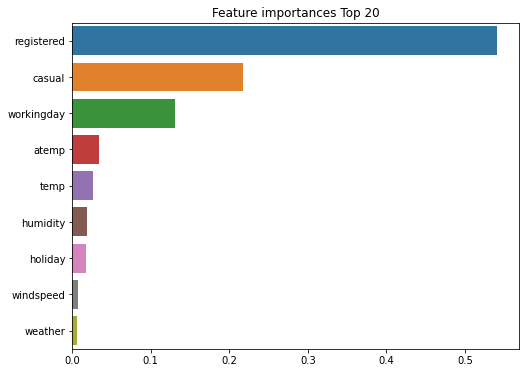

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline
ftr_importances_values=best_df_clf.feature_importances_
ftr_importances=pd.Series(ftr_importances_values, index=X_train.columns)
ftr_top20=ftr_importances.sort_values(ascending=False)[:20]
plt.figure(figsize=(8,6))
plt.title('Feature importances Top 20')
sns.barplot(x=ftr_top20, y=ftr_top20.index)
plt.show()

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

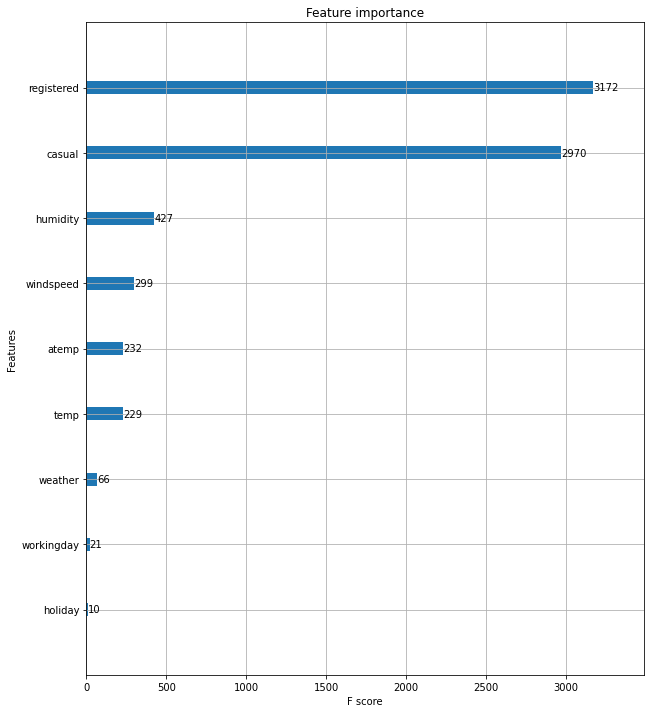

In [20]:
from xgboost import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax=plt.subplots(figsize=(10,12))
plot_importance(xgb_clf, ax=ax)